# Init

In [2]:
import collections


## Dataset-specific -- edit me
data_number = "082"
data_name = "Final"

treatments = collections.OrderedDict()
treatments['control'] = 'control'
treatments['noreward'] = 'benign'
treatments['punish'] = 'harsh'

## basic config
#base_path = "/home/rosiec/Dropbox/School_Docs/Papers/ALife\ CE\ Paper/alife2016/evo_mod/"
#base_path = "/home/rosiec/Dropbox/School_Docs/Papers/Journal\ CE\ Paper/data_analysis/"
base_path = "/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/"

raw_data_directory = "raw_data"
analysis_directory = "intermediate_data"
scripts_path = "~/Dropbox/School_Docs/Research/research_scripts/"

## generated
data_directory = data_number + "_" + "_".join(data_name.split(" "))
data_path = base_path + raw_data_directory + "/" + data_directory
analysis_path = base_path + analysis_directory

print (data_path)
print (analysis_path)



/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data


In [3]:
%cd {data_path}
%mkdir {analysis_path}
%cd {analysis_path}
%pwd


/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final
mkdir: cannot create directory ‘/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data’: File exists
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data


u'/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data'

In [4]:
import glob


import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy  
import scikits.bootstrap as bootstrap
from scipy import stats
import scipy.stats as ss
import matplotlib.gridspec as gridspec
#from IPython.display import Image
from PIL import Image
from IPython.display import Image as ipyImage

%matplotlib inline
%rehashx
pd.__version__

u'0.20.3'

In [5]:
import sys
sys.path.append({scripts_path})
%run {scripts_path}/quickplot.py --help

Usage: quickplot.py [options] outfile [input_file1 column1 "directory_glob1" name1 .. input_fileN columnN "directory_globN" nameN] 
          


Options:
  -h, --help            show this help message and exit
  -v, --verbose         print extra messages to stdout
  -d, --debug_messages  print debug messages to stdout
  --plotonly            Skip the aggregation step, and plot only, using
                        existing data files.
  --noplot              Skip the plotting step, only aggregate the data files.
  -t TITLE, --title=TITLE
                        set a different title than outfile (default)
  -x XLABEL, --xlabel=XLABEL
                        X-axis Label
  -y YLABEL, --ylabel=YLABEL
                        Y-axis Label
  --include_chevrons    Include line marker glyphs in addition to color
  --chevrons_by_members
                        Make the chevrons track by members, along with line
                        style
  --data_members=MEMBER_COUNT
                        N

# Mutational Landscaping - 1 Step Viables

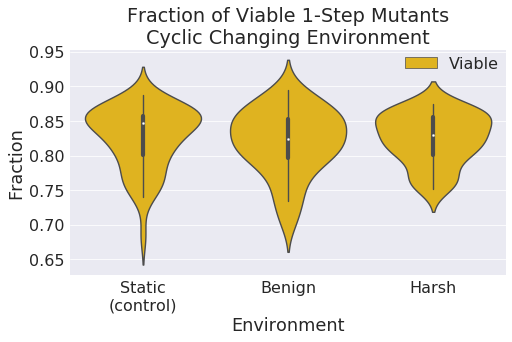

In [6]:
#FracViable         1
#FracDoesTask1      2
#FracDoesTask2      3
#FracDoesBoth       4
#FracChangedTask1   5
#FracChangedTask2   6
#FracChangedBoth    7
#FracGainedTask1    8
#FracGainedTask2    9
#FracGainedBoth    10
#FracLostTask1     11
#FracLostTask2     12
#FracLostBoth      13
#FracGainedTask1LostTask2   14
#FracLostTask1GainedTask2   15


subdir = "../203_CyclicCE__MutLandscape_1Step/"


tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + treatment + "/data/mutation_landscape_metrics.csv"
    filepath = filepath.replace("\\", "")

    df = pd.read_csv(filepath, sep=",", header=None, usecols=[0],
                names=["Viable"],
                comment="#",
                skip_blank_lines=True,
                )
    
    df = pd.melt(df, value_name="Fraction", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    dfs.append(df)
    
combined = pd.concat(dfs)

combined.to_pickle('203_CCE_MutLand_1Step_Neutrals.pd.pickle')

sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="bright"
)
sns.set_context('paper', font_scale=2)
g = sns.factorplot(x="Environment", y="Fraction",
                   hue="Type",
                   data=combined,
                   size=5, aspect=1.5, #
                   palette={"Viable": "y", 
                           # "XOR": "r",
                           # "XOR & EQU": "#89008E"
                           },
                   kind="violin", 
                   legend=False
              )
plt.subplots_adjust(top=0.85)

titles = ["Fraction of Viable 1-Step Mutants\nCyclic Changing Environment"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
#    ax.set_ylim([0,0.35])
    
L=plt.legend(#loc="upper right",
    bbox_to_anchor=(1, 1), 
            loc=0, 
               borderaxespad=0.)


# Mutational Landscaping - 1 Step Task Performance

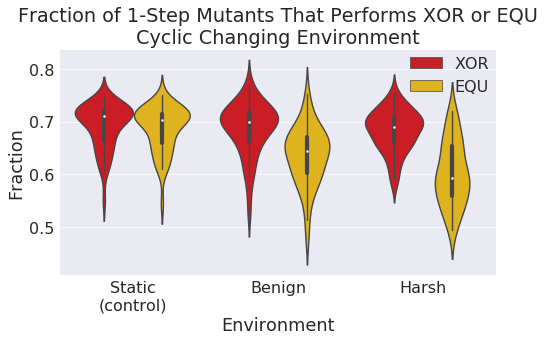

In [7]:
#FracViable         1
#FracDoesTask1      2
#FracDoesTask2      3
#FracDoesBoth       4
#FracChangedTask1   5
#FracChangedTask2   6
#FracChangedBoth    7
#FracGainedTask1    8
#FracGainedTask2    9
#FracGainedBoth    10
#FracLostTask1     11
#FracLostTask2     12
#FracLostBoth      13
#FracGainedTask1LostTask2   14
#FracLostTask1GainedTask2   15


subdir = "../203_CyclicCE__MutLandscape_1Step/"


tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + treatment + "/data/mutation_landscape_metrics.csv"
    filepath = filepath.replace("\\", "")

    df = pd.read_csv(filepath, sep=",", header=None, usecols=[1, 2],
                names=["XOR", "EQU"
                      ],
                comment="#",
                skip_blank_lines=True,
                )
    
    df = pd.melt(df, value_name="Fraction", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    dfs.append(df)
    
combined = pd.concat(dfs)

combined.to_pickle('203_CCE_MutLand_1Step_Neutrals.pd.pickle')

sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="bright"
)
sns.set_context('paper', font_scale=2)
g = sns.factorplot(x="Environment", y="Fraction",
                   hue="Type",
                   data=combined,
                   size=5, aspect=1.5, #
                   palette={"EQU": "y", 
                            "XOR": "r",
                           # "XOR & EQU": "#89008E"
                           },
                   kind="violin", 
                   legend=False
              )
plt.subplots_adjust(top=0.85)

titles = ["Fraction of 1-Step Mutants That Performs XOR or EQU\nCyclic Changing Environment"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
#    ax.set_ylim([0,0.35])
    
L=plt.legend(#loc="upper right",
    bbox_to_anchor=(1, 1), 
            loc=0, 
               borderaxespad=0.)


# Mutational Landscaping - 1 Step Neutrals

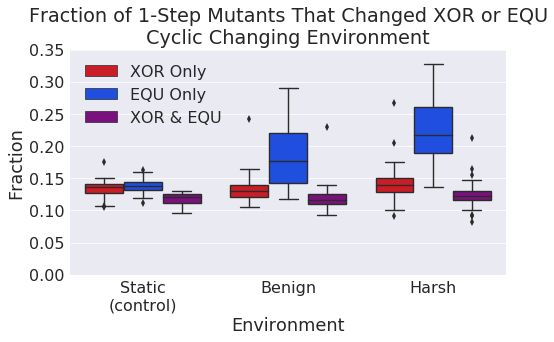

In [8]:
#FracViable         1
#FracDoesTask1      2
#FracDoesTask2      3
#FracDoesBoth       4
#FracChangedTask1   5
#FracChangedTask2   6
#FracChangedBoth    7
#FracGainedTask1    8
#FracGainedTask2    9
#FracGainedBoth    10
#FracLostTask1     11
#FracLostTask2     12
#FracLostBoth      13
#FracGainedTask1LostTask2   14
#FracLostTask1GainedTask2   15


subdir = "../203_CyclicCE__MutLandscape_1Step/"


tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + treatment + "/data/mutation_landscape_metrics.csv"
    filepath = filepath.replace("\\", "")

    df = pd.read_csv(filepath, sep=",", header=None, usecols=[4, 5,
                                                              6],
                names=["XOR Only", "EQU Only"
                       , "XOR & EQU"
                      ],
                comment="#",
                skip_blank_lines=True,
                )
    
    df = pd.melt(df, value_name="Fraction", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    dfs.append(df)
    
combined = pd.concat(dfs)

combined.to_pickle('203_CCE_MutLand_1Step_Neutrals.pd.pickle')

sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="bright"
)
sns.set_context('paper', font_scale=2)
g = sns.factorplot(x="Environment", y="Fraction",
                   hue="Type",
                   data=combined,
                   size=5, aspect=1.5, #
                   palette={"EQU Only": "b", 
                            "XOR Only": "r",
                            "XOR & EQU": "#89008E"},
                   kind="box", 
                   legend=False
              )
plt.subplots_adjust(top=0.85)

titles = ["Fraction of 1-Step Mutants That Changed XOR or EQU\nCyclic Changing Environment"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    ax.set_ylim([0,0.35])
    
L=plt.legend(loc="upper left")


# Mutational Landscaping - 1 Step Gained

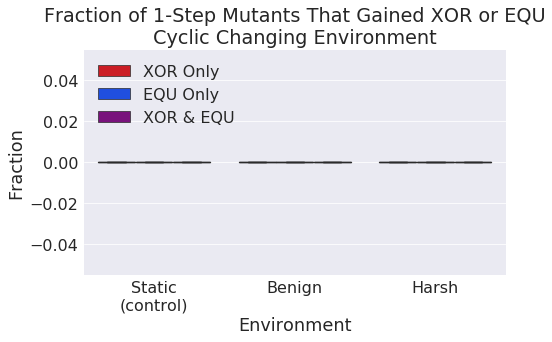

In [9]:
#FracViable         1
#FracDoesTask1      2
#FracDoesTask2      3
#FracDoesBoth       4
#FracChangedTask1   5
#FracChangedTask2   6
#FracChangedBoth    7
#FracGainedTask1    8
#FracGainedTask2    9
#FracGainedBoth    10
#FracLostTask1     11
#FracLostTask2     12
#FracLostBoth      13
#FracGainedTask1LostTask2   14
#FracLostTask1GainedTask2   15


subdir = "../203_CyclicCE__MutLandscape_1Step/"


tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + treatment + "/data/mutation_landscape_metrics.csv"
    filepath = filepath.replace("\\", "")

    df = pd.read_csv(filepath, sep=",", header=None, usecols=[7, 8,
                                                              9],
                names=["XOR Only", "EQU Only"
                       , "XOR & EQU"
                      ],
                comment="#",
                skip_blank_lines=True,
                )
    
    df = pd.melt(df, value_name="Fraction", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    dfs.append(df)
    
combined = pd.concat(dfs)

combined.to_pickle('203_CCE_MutLand_1Step_Neutrals.pd.pickle')

sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="bright"
)
sns.set_context('paper', font_scale=2)
g = sns.factorplot(x="Environment", y="Fraction",
                   hue="Type",
                   data=combined,
                   size=5, aspect=1.5, #
                   palette={"EQU Only": "b", 
                            "XOR Only": "r",
                            "XOR & EQU": "#89008E"},
                   kind="box", 
                   legend=False
              )
plt.subplots_adjust(top=0.85)

titles = ["Fraction of 1-Step Mutants That Gained XOR or EQU\nCyclic Changing Environment"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    #ax.set_ylim([0,0.35])
    
L=plt.legend(loc="upper left")


# Mutational Landscaping - 1 Step Loss - Figure 6

/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data


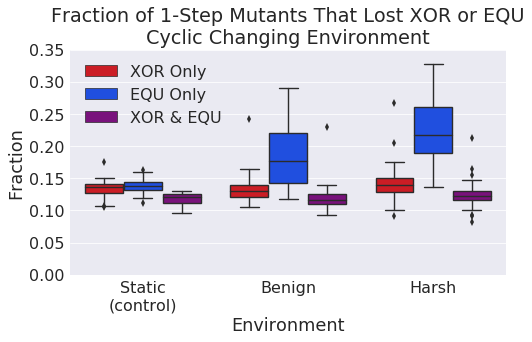

In [10]:
subdir = "../203_CyclicCE__MutLandscape_1Step/"


tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + treatment + "/data/mutation_landscape_metrics.csv"
    filepath = filepath.replace("\\", "")

    df = pd.read_csv(filepath, sep=",", header=None, usecols=[10, 11,
                                                              12],
                names=["XOR Only", "EQU Only"
                       , "XOR & EQU"
                      ],
                comment="#",
                skip_blank_lines=True,
                )
    
    df = pd.melt(df, value_name="Fraction", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    dfs.append(df)
    
combined = pd.concat(dfs)

combined.to_pickle('203_CCE_MutLand_1Step.pd.pickle')

sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="bright"
)
sns.set_context('paper', font_scale=2)
#plt.figure(figsize=(11,5), dpi=300)
g = sns.factorplot(x="Environment", y="Fraction",
                   hue="Type",
                   data=combined,
                   size=5, aspect=1.5, #
                   palette={"EQU Only": "b", 
                            "XOR Only": "r",
                            "XOR & EQU": "#89008E"},
                   kind="box", 
                   legend=False
                   #ax=ax,
              )
plt.subplots_adjust(top=0.85)

titles = ["Fraction of 1-Step Mutants That Lost XOR or EQU\nCyclic Changing Environment"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    ax.set_ylim([0,0.35])
    
L=plt.legend(loc="upper left")
!pwd
plt.savefig("CCE_frac_1step__box.png", dpi=300)

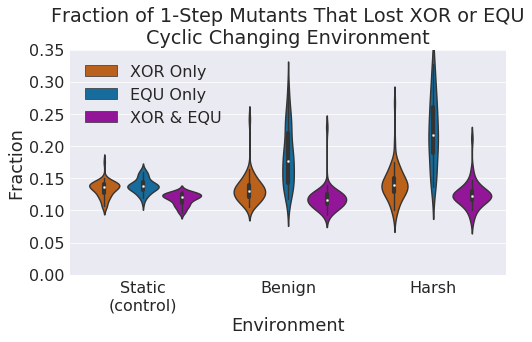

In [11]:
subdir = "../203_CyclicCE__MutLandscape_1Step/"


tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + treatment + "/data/mutation_landscape_metrics.csv"
    filepath = filepath.replace("\\", "")

    df = pd.read_csv(filepath, sep=",", header=None, usecols=[10, 11,
                                                              12],
                names=["XOR Only", "EQU Only"
                       , "XOR & EQU"
                      ],
                comment="#",
                skip_blank_lines=True,
                )
    
    df = pd.melt(df, value_name="Fraction", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    dfs.append(df)
    
combined = pd.concat(dfs)

combined.to_pickle('203_CCE_MutLand_1Step.pd.pickle')

sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="colorblind"
)
sns.set_context('paper', font_scale=2)
g = sns.factorplot(x="Environment", y="Fraction",
                   hue="Type",
                   data=combined,
                   size=5, aspect=1.5, #
                   palette={"EQU Only": "b", 
                            "XOR Only": "r",
                            "XOR & EQU": "#A900AE"},
                   kind="violin", 
                   legend=False
              )
plt.subplots_adjust(top=0.85)

titles = ["Fraction of 1-Step Mutants That Lost XOR or EQU\nCyclic Changing Environment"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
    ax.set_ylim([0,0.35])
    
L=plt.legend(loc="upper left")


# Stats

In [12]:
print combined.head()

       Type  Fraction        Environment
0  XOR Only  0.130395  Static\n(control)
1  XOR Only  0.142639  Static\n(control)
2  XOR Only  0.111111  Static\n(control)
3  XOR Only  0.118763  Static\n(control)
4  XOR Only  0.140496  Static\n(control)


In [13]:
equonly = combined.loc[combined['Type'] == 'EQU Only']

a = equonly.loc[equonly['Environment'] == 'Static\n(control)']
b = equonly.loc[equonly['Environment'] == 'Benign']
c = equonly.loc[equonly['Environment'] == 'Harsh']

print a.head()
print b.head()
print c.head()

        Type  Fraction        Environment
49  EQU Only  0.151515  Static\n(control)
50  EQU Only  0.154882  Static\n(control)
51  EQU Only  0.111417  Static\n(control)
52  EQU Only  0.122436  Static\n(control)
53  EQU Only  0.157637  Static\n(control)
        Type  Fraction Environment
46  EQU Only  0.140496      Benign
47  EQU Only  0.128252      Benign
48  EQU Only  0.137129      Benign
49  EQU Only  0.275482      Benign
50  EQU Only  0.179369      Benign
        Type  Fraction Environment
50  EQU Only  0.238139       Harsh
51  EQU Only  0.191001       Harsh
52  EQU Only  0.139272       Harsh
53  EQU Only  0.235384       Harsh
54  EQU Only  0.139272       Harsh


In [14]:
def mww(a, b, nameA, nameB, title, field):
    print
    print title + " - " + nameA + " vs " + nameB
    print "-----------------"
    print stats.ranksums(a[field], b[field]) 
    z_stat, p_val = stats.ranksums(a[field], b[field])  

    #print (z_stat)
    #print (p_val)

    if p_val < (0.05/3): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
    print "medians"
    print nameA, a[field].median()
    print nameB, b[field].median()

    

In [15]:
mww(a, b, "Static", 'Benign', 'EQU Only', 'Fraction')
mww(a, c, "Static", 'Harsh', 'EQU Only', 'Fraction')



EQU Only - Static vs Benign
-----------------
RanksumsResult(statistic=-5.4623329539594403, pvalue=4.6991765180563988e-08)
reject null of sameness (different)
medians
Static 0.137434955617
Benign 0.177532904805

EQU Only - Static vs Harsh
-----------------
RanksumsResult(statistic=-7.8033744662949811, pvalue=6.0273359092304226e-15)
reject null of sameness (different)
medians
Static 0.137434955617
Harsh 0.217018671564


# Mutational Landscaping  - 2 Step Regain - Figure 7

control
................................................. done
noreward
............................................ done
punish
.................................................. done


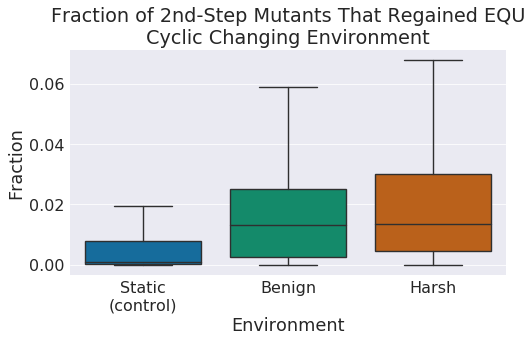

In [16]:
subdir = "../205_CyclicCE__MutLandscape_2ndStep/config"

## go to the place where the raw data is
actual_dir = "/Core/home/rosiec/__research/mutational_landscapes/raw_data/205_CyclicCE__MutLandscape_2ndStep/config"

tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

combined = []
tct = 0
for treatment in treatments:  
    tct += 1
    
#    print "HI"
    print treatment

    dfs = []

    for i in range(0,100):

        bit = str(i) 
        dirname = actual_dir + "/" + "data_" + treatment + "_" + bit
        
        filepath = dirname + '/mutation_landscape_metrics.csv'
        
        if os.path.isfile(filepath):
            sys.stdout.write('.')

            df = pd.read_csv(filepath, sep=",", header=None, usecols=[8], comment="#",skip_blank_lines=True,
                names=["Regained EQU"])

            df = pd.melt(df, value_name="Fraction", var_name=["Type"])
            df['treatment'] = [treatment] * len(df)
            df['Environment'] = [tname[treatment]] * len(df)
            df['replicate'] = [i] * len(df)

            dfs.append(df)
    print " done"
    dfs = pd.concat(dfs)
#    print dfs.describe()
#    print dfs.head()
    
    combined.append(dfs)

combined = pd.concat(combined)
#print combined.head()

combined.to_pickle('205_CCE_MutLand_2Step.pd.pickle')


sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="colorblind"
)
sns.set_context('paper', font_scale=2)
g = sns.factorplot(x="Environment", y="Fraction",
                   #hue="Type",
                   data=combined,
                   size=5, aspect=1.5, #
                   #palette={"Regained EQU": "b"},
                   kind="box", 
                   legend=False,
                   showfliers=False
              )
plt.subplots_adjust(top=0.85)

titles = ["Fraction of 2nd-Step Mutants That Regained EQU\nCyclic Changing Environment"]
for ax, title in zip(g.axes.flat, titles):
    ax.set_title(title)
plt.savefig("CCE_frac_2step__box", dpi=300)

In [17]:
print combined.describe()


           Fraction     replicate
count  29116.000000  29116.000000
mean       0.018188     24.543447
std        0.021890     13.883777
min        0.000000      0.000000
25%        0.002143     12.000000
50%        0.011019     24.000000
75%        0.025099     36.000000
max        0.177839     49.000000


/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data
3616
9505
15995


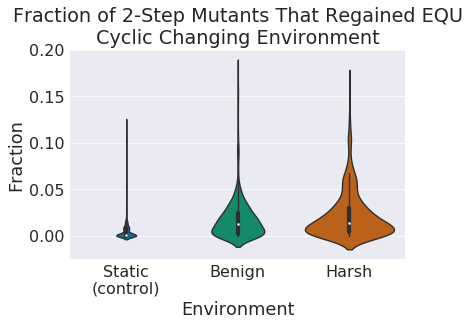

In [18]:
subdir = "../205_CyclicCE__MutLandscape_2ndStep/"

!pwd

tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + treatment + "__mutation_landscape_metrics.csv"
    filepath = filepath.replace("\\", "")

    df = pd.read_csv(filepath, sep=",", header=None, usecols=[8], comment="#",skip_blank_lines=True,
                names=["Regained EQU"])
    
    print len(df)
    
    df = pd.melt(df, value_name="Fraction", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    dfs.append(df)
    
combined_aggregated = pd.concat(dfs)
#combined.to_pickle('205_CCE_MutLand_2Step.pd.pickle')


sns.set(#style="whitegrid", 
        color_codes=True, 
        palette="colorblind"
)
sns.set_context('paper', font_scale=2)
g = sns.violinplot(x="Environment", y="Fraction",
                   #hue="Type",
                   data=combined_aggregated,
                   #colors=['red', 'green', 'blue'],
                   #size=5, aspect=1.5, #
                   #palette={"Regained EQU": "w"},
                   #kind="violin", 
                   #legend=False,
                   #showfliers=False,
                   scale="count", scale_hue=False, bw=.3,
                   inner="box", 
              )

plt.subplots_adjust(top=0.85)

plt.title("Fraction of 2-Step Mutants That Regained EQU\nCyclic Changing Environment")
#for ax, title in zip(g.axes.flat, titles):
#    ax.set_title(title)


# Stats

In [19]:
print combined.head()

           Type  Fraction treatment        Environment  replicate
0  Regained EQU  0.009795   control  Static\n(control)          0
1  Regained EQU  0.009795   control  Static\n(control)          0
2  Regained EQU  0.003061   control  Static\n(control)          0
3  Regained EQU  0.009795   control  Static\n(control)          0
4  Regained EQU  0.003061   control  Static\n(control)          0


In [20]:
equonly = combined.loc[combined['Type'] == 'Regained EQU']

a = equonly.loc[equonly['Environment'] == 'Static\n(control)']
b = equonly.loc[equonly['Environment'] == 'Benign']
c = equonly.loc[equonly['Environment'] == 'Harsh']

print a.head()
print b.head()
print c.head()

           Type  Fraction treatment        Environment  replicate
0  Regained EQU  0.009795   control  Static\n(control)          0
1  Regained EQU  0.009795   control  Static\n(control)          0
2  Regained EQU  0.003061   control  Static\n(control)          0
3  Regained EQU  0.009795   control  Static\n(control)          0
4  Regained EQU  0.003061   control  Static\n(control)          0
           Type  Fraction treatment Environment  replicate
0  Regained EQU  0.000306  noreward      Benign          0
1  Regained EQU  0.000306  noreward      Benign          0
2  Regained EQU  0.000306  noreward      Benign          0
3  Regained EQU  0.000612  noreward      Benign          0
4  Regained EQU  0.000612  noreward      Benign          0
           Type  Fraction treatment Environment  replicate
0  Regained EQU  0.000306    punish       Harsh          0
1  Regained EQU  0.002143    punish       Harsh          0
2  Regained EQU  0.010101    punish       Harsh          0
3  Regained EQ

In [21]:
mww(a, b, "Static", 'Benign', 'Regained EQU', 'Fraction')
mww(a, c, "Static", 'Harsh', 'Regained EQU', 'Fraction')



Regained EQU - Static vs Benign
-----------------
RanksumsResult(statistic=-47.900219393560519, pvalue=0.0)
reject null of sameness (different)
medians
Static 0.000918273645546
Benign 0.0131619222528

Regained EQU - Static vs Harsh
-----------------
RanksumsResult(statistic=-57.822921730422301, pvalue=0.0)
reject null of sameness (different)
medians
Static 0.000918273645546
Harsh 0.013468013468


# Correlation between functional sites and 1-step survey

In [22]:
subdir = "../201_CyclicCE/"

dfs = []

tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

for treatment in treatments:
    filepath = data_path + "/" + subdir + "/*" + treatment + "*dominant_active_site_counts.csv"
    filepath = filepath.replace("\\", "")
    print filepath
    filepath = sorted(glob.glob(filepath))[0]    
        
    df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2],comment="#",skip_blank_lines=True,
                names=["EQU Only", "XOR Only", "XOR & EQU"])
    
    df = pd.melt(df, value_name="Sites", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    df['Site'] = ["Active"] * len(df)
    dfs.append(df)
    
actives = pd.concat(dfs)

dfs = []
for treatment in treatments:
    filepath = data_path + "/" + subdir + "/*" + treatment + "*dominant_vestigial_site_counts.csv"
    filepath = filepath.replace("\\", "")
    filepath = sorted(glob.glob(filepath))[0]
            
    df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2],
                names=["EQU Only", "XOR Only", "XOR & EQU"],
                comment="#",
                skip_blank_lines=True,
                )
    df = pd.melt(df, value_name="Sites", var_name=["Type"])
    df['Environment'] = [tname[treatment]] * len(df)
    df['Site'] = ["Vestigial"] * len(df)
    dfs.append(df)
    
vestigials = pd.concat(dfs)

combined_func_vest = pd.concat([actives, vestigials])

# sns.set(#style="whitegrid", 
#         color_codes=True, 
#         palette="bright"
# )
# sns.set_context('paper', font_scale=2)
# g = sns.factorplot(x="Environment", y="Sites",
#                    hue="Type",
#                    col="Site",
#                    data=combined, 
#                    hue_order=["XOR Only", "EQU Only", "XOR & EQU"],
#                    size=5, aspect=.75, #
#                    palette={"EQU Only": "b", 
#                             "XOR Only": "r",
#                             "XOR & EQU": "#89008E"},
#                    kind="box", 
#                    legend=False)        

# plt.subplots_adjust(top=0.85)
# g.fig.suptitle("       Cyclic Changing Environment") # can also get the figure from plt.gcf()   

# titles = ["Functional Site Count", "Vestigial Site Count"]
# for ax, title in zip(g.axes.flat, titles):
#     ax.set_title(title)
    
# L=plt.legend(loc="upper left")

# #plt.subplots_adjust(top=0.85)
# #g.fig.suptitle("       Cyclic Changing Environment") # can also get the figure from plt.gcf()   

/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*control*dominant_active_site_counts.csv
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*noreward*dominant_active_site_counts.csv
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*punish*dominant_active_site_counts.csv


## 1-Step

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal_CE_Paper/data_analysis/intermediate_data


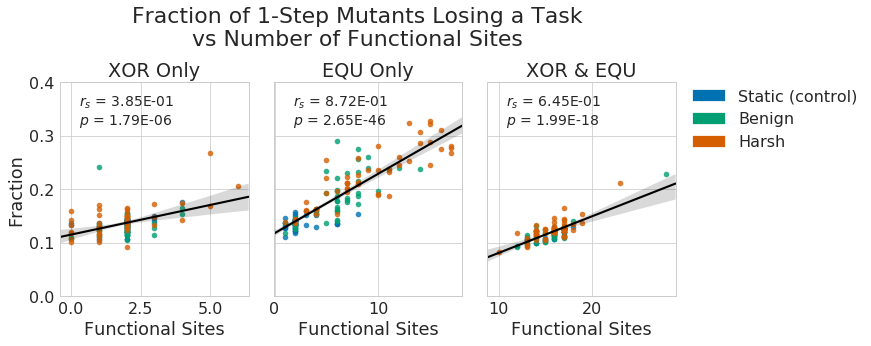

In [23]:
# ### Set up the canvas
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)

fig = plt.figure(figsize=(10, 5)) 
gs = gridspec.GridSpec(1, 3)#, width_ratios=[1]) 

onestep = pd.read_pickle('203_CCE_MutLand_1Step.pd.pickle')

# # ## set up the colors
colors = ['b', 'g', 'r']
coldic = {}
for l,c in zip(actives['Environment'].unique(), colors):
    coldic[l] = c


######## figures
mainax = None
for g, sitetype in zip(gs, onestep['Type'].unique()):

    if mainax == None:
        ax = fig.add_subplot(g)
        mainax = ax
    else:
        ax = fig.add_subplot(g, sharey=mainax)
        plt.setp(ax.get_yticklabels(), visible=False)

        
#        ax.set_ylabel(" ")
#        ax.get_yl
    
    
    
    fractionsbit = onestep[onestep['Type'] == sitetype]
    sitesbit = actives[actives['Type'] == sitetype]

    for pid in actives['Environment'].unique():

        equonly_fractions_bit = fractionsbit[fractionsbit['Environment'] == pid]
        equonly_sites_bit = sitesbit[sitesbit['Environment'] == pid]

        sns.regplot(x=equonly_sites_bit['Sites'], y=equonly_fractions_bit['Fraction'],
                    fit_reg=False,
                    ax=ax
                   )
    sns.regplot(x=sitesbit['Sites'], y=fractionsbit['Fraction'], 
                data=onestep, 
                ci=95,
                color='black',
                scatter=False, 
                ax=ax
               )
    #ax.legend()
    ax.set_ylim([0,0.4])
    ax.set_title(sitetype)
    #ax2.set_ylabel("Fraction Beneficial")
    ax.set_xlabel("Functional Sites")
    if ax != mainax:
        ax.set(ylabel='')
        #plt.setp(ax.get_ylabel(), visible=False)

    
    # ##### Calculate and print the correlation
    correlation = ss.spearmanr(sitesbit['Sites'], fractionsbit['Fraction'])
    from decimal import Decimal

    r2 = '%.2E' % Decimal(correlation[0])
    p = '%.2E' % Decimal(correlation[1])
    
    rawbit = r'$r_s$'

    ann = rawbit + " = " + r2 + "\n" + "$p$ = " + p
#    ann = "rho = " + r2 + "\n" + "p = " + p

    ax.annotate(ann, xy=(0.1,0.8),xycoords='axes fraction',
                 fontsize=14)

    ax.legend(loc="best")

import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=coldic[k], label=" ".join(k.split("\n"))) for k in coldic.keys()]
lg = ax.legend(handles=legend_patches, 
           bbox_to_anchor=(2, 1), 
            loc=0, 
               borderaxespad=0.)


plt.suptitle("      Fraction of 1-Step Mutants Losing a Task\n      vs Number of Functional Sites", size=22)
plt.tight_layout()


plt.subplots_adjust(top=0.77)

!pwd
plt.savefig("CCE_frac_1step_vs_func_sites.png", dpi=300, bbox_inches='tight')

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Intercept    0.115178
Sites        0.011090
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Fraction   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.222
Method:                 Least Squares   F-statistic:                     42.17
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           1.29e-09
Time:                        20:26:22   Log-Likelihood:                 367.39
No. Observations:                 145   AIC:                            -730.8
Df Residuals:                     143   BIC:                            -724.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

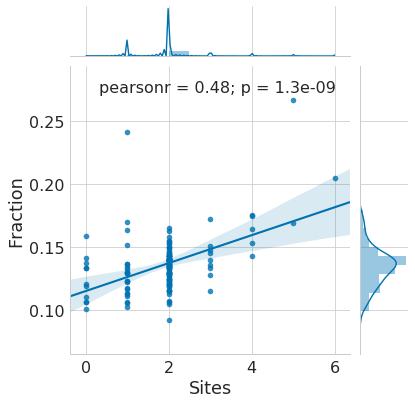

Intercept    0.11781
Sites        0.01113
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Fraction   R-squared:                       0.770
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     477.6
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           2.00e-47
Time:                        20:26:23   Log-Likelihood:                 325.51
No. Observations:                 145   AIC:                            -647.0
Df Residuals:                     143   BIC:                            -641.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

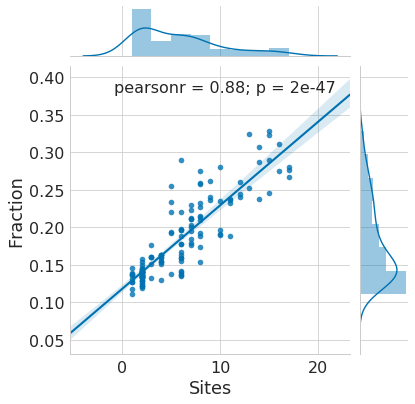

Intercept    0.012689
Sites        0.006826
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Fraction   R-squared:                       0.631
Model:                            OLS   Adj. R-squared:                  0.628
Method:                 Least Squares   F-statistic:                     244.4
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           9.41e-33
Time:                        20:26:23   Log-Likelihood:                 457.55
No. Observations:                 145   AIC:                            -911.1
Df Residuals:                     143   BIC:                            -905.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------

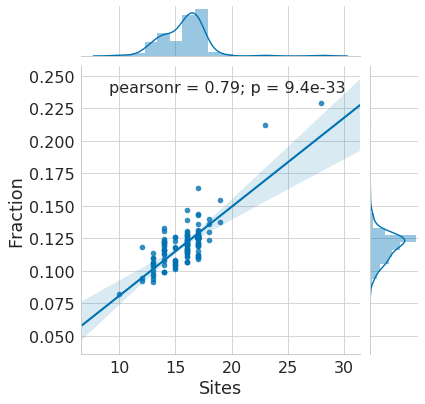

In [38]:
import statsmodels.formula.api as sm_api

# ### Set up the canvas
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)

fig = plt.figure(figsize=(10, 5)) 
#gs = gridspec.GridSpec(1, 3)#, width_ratios=[1]) 

onestep = pd.read_pickle('203_CCE_MutLand_1Step.pd.pickle')

# # ## set up the colors
colors = ['b', 'g', 'r']
coldic = {}
for l,c in zip(actives['Environment'].unique(), colors):
    coldic[l] = c


######## figures
mainax = None
for g, sitetype in zip(gs, onestep['Type'].unique()):
    
    fractionsbit = onestep[onestep['Type'] == sitetype]
    sitesbit = actives[actives['Type'] == sitetype]  
    
    sitesseries = pd.Series(sitesbit['Sites'], name='Sites')
    fractionseries = pd.Series(fractionsbit['Fraction'], name='Fraction')
    md = sitesbit
    md['Fraction'] = fractionseries.tolist()    
    
    import statsmodels.formula.api as sm


    model = sm.ols(formula="Fraction ~ Sites", data=md)

    fitted = model.fit()
    print fitted.params
    print fitted.summary()

    print "##############################################################"
    print fitted.summary().as_latex()
    print "##############################################################"
    #print fitted.summary2()
    #print "##############################################################"
    #print fitted.summary2().as_latex()
    

#     sns.lmplot(x="Sites", y="Fraction", data=md)
#     plt.show()
        
#     sns.residplot(x="Sites", y="Fraction", data=md)    
#     plt.show()
    
#     g = sns.jointplot(x="Sites", y="Fraction", data=md, kind="reg", stat_func=ss.spearmanr, robust=True)
#     plt.show()
    
#     g = sns.jointplot(x="Sites", y="Fraction", data=md, kind="reg", stat_func=ss.spearmanr)
#     plt.show()

    g = sns.jointplot(x="Sites", y="Fraction", data=md, kind="reg")
    plt.show()

    print "=============================================================================="


       Type  Fraction        Environment
0  XOR Only  0.130395  Static\n(control)
1  XOR Only  0.142639  Static\n(control)
2  XOR Only  0.111111  Static\n(control)
3  XOR Only  0.118763  Static\n(control)
4  XOR Only  0.140496  Static\n(control)
        Type  Sites        Environment    Site
49  XOR Only      1  Static\n(control)  Active
50  XOR Only      2  Static\n(control)  Active
51  XOR Only      1  Static\n(control)  Active
52  XOR Only      2  Static\n(control)  Active
53  XOR Only      2  Static\n(control)  Active
        Type  Sites        Environment    Site  Fraction
49  XOR Only      1  Static\n(control)  Active  0.130395
50  XOR Only      2  Static\n(control)  Active  0.142639
51  XOR Only      1  Static\n(control)  Active  0.111111
52  XOR Only      2  Static\n(control)  Active  0.118763
53  XOR Only      2  Static\n(control)  Active  0.140496
            Sites    Fraction
count  145.000000  145.000000
mean     1.889655    0.136135
std      0.943672    0.021929
min      0

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


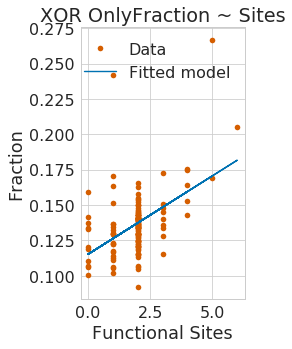

        Type  Fraction        Environment
49  EQU Only  0.151515  Static\n(control)
50  EQU Only  0.154882  Static\n(control)
51  EQU Only  0.111417  Static\n(control)
52  EQU Only  0.122436  Static\n(control)
53  EQU Only  0.157637  Static\n(control)
       Type  Sites        Environment    Site
0  EQU Only      4  Static\n(control)  Active
1  EQU Only      4  Static\n(control)  Active
2  EQU Only      1  Static\n(control)  Active
3  EQU Only      2  Static\n(control)  Active
4  EQU Only      2  Static\n(control)  Active
       Type  Sites        Environment    Site  Fraction
0  EQU Only      4  Static\n(control)  Active  0.151515
1  EQU Only      4  Static\n(control)  Active  0.154882
2  EQU Only      1  Static\n(control)  Active  0.111417
3  EQU Only      2  Static\n(control)  Active  0.122436
4  EQU Only      2  Static\n(control)  Active  0.157637
            Sites    Fraction
count  145.000000  145.000000
mean     5.758621    0.181905
std      4.223407    0.053585
min      1.00000

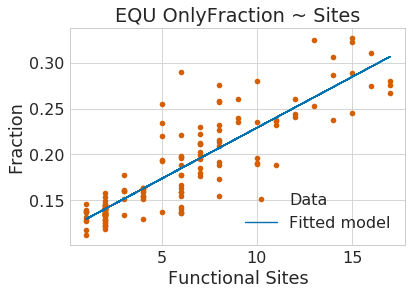

          Type  Fraction        Environment
98   XOR & EQU  0.120600  Static\n(control)
99   XOR & EQU  0.123661  Static\n(control)
100  XOR & EQU  0.104071  Static\n(control)
101  XOR & EQU  0.106520  Static\n(control)
102  XOR & EQU  0.123967  Static\n(control)
          Type  Sites        Environment    Site
98   XOR & EQU     16  Static\n(control)  Active
99   XOR & EQU     16  Static\n(control)  Active
100  XOR & EQU     15  Static\n(control)  Active
101  XOR & EQU     16  Static\n(control)  Active
102  XOR & EQU     16  Static\n(control)  Active
          Type  Sites        Environment    Site  Fraction
98   XOR & EQU     16  Static\n(control)  Active  0.120600
99   XOR & EQU     16  Static\n(control)  Active  0.123661
100  XOR & EQU     15  Static\n(control)  Active  0.104071
101  XOR & EQU     16  Static\n(control)  Active  0.106520
102  XOR & EQU     16  Static\n(control)  Active  0.123967
            Sites    Fraction
count  145.000000  145.000000
mean    15.744828    0.12016

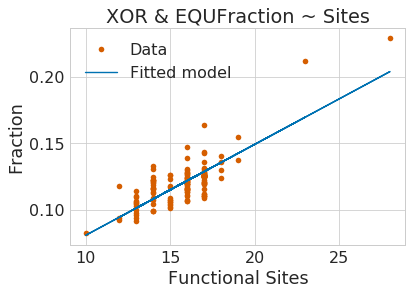

ValueError: max() arg is an empty sequence

In [25]:
import statsmodels.formula.api as sm_api

# ### Set up the canvas
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)

fig = plt.figure(figsize=(10, 5)) 
gs = gridspec.GridSpec(1, 3)#, width_ratios=[1]) 

onestep = pd.read_pickle('203_CCE_MutLand_1Step.pd.pickle')

# # ## set up the colors
colors = ['b', 'g', 'r']
coldic = {}
for l,c in zip(actives['Environment'].unique(), colors):
    coldic[l] = c


######## figures
mainax = None
for g, sitetype in zip(gs, onestep['Type'].unique()):

    if mainax == None:
        ax = fig.add_subplot(g)
        mainax = ax
    else:
        ax = fig.add_subplot(g, sharey=mainax)
        plt.setp(ax.get_yticklabels(), visible=False)

        
#        ax.set_ylabel(" ")
#        ax.get_yl
    
    fractionsbit = onestep[onestep['Type'] == sitetype]
    print fractionsbit.head()
    sitesbit = actives[actives['Type'] == sitetype]  
    print sitesbit.head()
    
    sitesseries = pd.Series(sitesbit['Sites'], name='Sites')
    fractionseries = pd.Series(fractionsbit['Fraction'], name='Fraction')
    #md = pd.concat([fractionseries, sitesseries], axis=1, ignore_index=True)
    md = sitesbit
    #md['Sites'] = sitesseries.tolist()
    md['Fraction'] = fractionseries.tolist()
    print md.head()
    print md.describe()
    
    
        
#     import statsmodels.api as sma
#     X = md['Sites']
#     y = md['Fraction']

#     ## fit a OLS model with intercept on TV and Radio
#     X = sma.add_constant(X)
#     fitted = sma.OLS(y, X).fit()
    
    import statsmodels.formula.api as sm


    model = sm.ols(formula="Fraction ~ Sites", data=md)

    fitted = model.fit()
    print fitted.params
    print fitted.summary()

    plt.plot(md['Sites'], md['Fraction'], 'ro')
    plt.plot(md['Sites'], fitted.fittedvalues, 'b')
    plt.legend(['Data', 'Fitted model'])
    plt.xlabel('Functional Sites')
    plt.ylabel('Fraction')
    plt.title(sitetype + 'Fraction ~ Sites')

    plt.show()
    # model = sm.ols(formula='Gas ~ Temp', data=whiteside, subset = whiteside['Insul']=="Before")
    # fitted = model.fit()
    # print fitted.summary()
    # Before = whiteside[whiteside["Insul"] == "Before"]
    # plt.plot(Before["Temp"], Before["Gas"], 'ro')
    # plt.plot(Before["Temp"], fitted.fittedvalues, 'b')
    # plt.legend(['Data', 'Fitted model'])
    # plt.ylim(0, 10)
    # plt.xlim(-2, 12)

    
    
    
    


#     for pid in actives['Environment'].unique():

#         equonly_fractions_bit = fractionsbit[fractionsbit['Environment'] == pid]
#         equonly_sites_bit = sitesbit[sitesbit['Environment'] == pid]

#         sns.regplot(x=equonly_sites_bit['Sites'], y=equonly_fractions_bit['Fraction'],
#                     fit_reg=False,
#                     ax=ax
#                    )
#     sns.regplot(x=sitesbit['Sites'], y=fractionsbit['Fraction'], 
#                 data=merged, 
#                 ci=95,
#                 color='black',
#                 scatter=False, 
#                 ax=ax
#                )
#     #ax.legend()
#     ax.set_ylim([0,0.4])
#     ax.set_title(sitetype)
#     #ax2.set_ylabel("Fraction Beneficial")
#     ax.set_xlabel("Functional Sites")
#     if ax != mainax:
#         ax.set(ylabel='')
#         #plt.setp(ax.get_ylabel(), visible=False)

    
#     # ##### Calculate and print the correlation
#     correlation = ss.spearmanr(sitesbit['Sites'], fractionsbit['Fraction'])
#     from decimal import Decimal

#     r2 = '%.2E' % Decimal(correlation[0])
#     p = '%.2E' % Decimal(correlation[1])
    
#     rawbit = r'$r_s$'

#     ann = rawbit + " = " + r2 + "\n" + "$p$ = " + p
# #    ann = "rho = " + r2 + "\n" + "p = " + p

#     ax.annotate(ann, xy=(0.1,0.8),xycoords='axes fraction',
#                  fontsize=14)

#     ax.legend(loc="best")

import matplotlib.patches as mpatches
legend_patches = [mpatches.Patch(color=coldic[k], label=" ".join(k.split("\n"))) for k in coldic.keys()]
lg = ax.legend(handles=legend_patches, 
           bbox_to_anchor=(2, 1), 
            loc=0, 
               borderaxespad=0.)


plt.suptitle("      Fraction of 1-Step Mutants Losing a Task\n      vs Number of Functional Sites", size=22)
plt.tight_layout()


plt.subplots_adjust(top=0.77)



NameError: name 'merged' is not defined

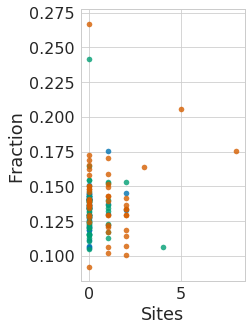

In [26]:
# ### Set up the canvas
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)

fig = plt.figure(figsize=(10, 5)) 
gs = gridspec.GridSpec(1, 3)#, width_ratios=[1]) 

onestep = pd.read_pickle('203_CCE_MutLand_1Step.pd.pickle')
siteset = vestigials

# # ## set up the colors
colors = ['b', 'g', 'r']
coldic = {}
for l,c in zip(siteset['Environment'].unique(), colors):
    coldic[l] = c


######## figures
for g, sitetype in zip(gs, onestep['Type'].unique()):

    ax = plt.subplot(g)
    
    fractionsbit = onestep[onestep['Type'] == sitetype]
    sitesbit = siteset[siteset['Type'] == sitetype]

    for pid in siteset['Environment'].unique():

        equonly_fractions_bit = fractionsbit[fractionsbit['Environment'] == pid]
        equonly_sites_bit = sitesbit[sitesbit['Environment'] == pid]

        sns.regplot(x=equonly_sites_bit['Sites'], y=equonly_fractions_bit['Fraction'],
                    fit_reg=False,
                    ax=ax
                   )
    sns.regplot(x=sitesbit['Sites'], y=fractionsbit['Fraction'], 
                data=merged, 
                ci=95,
                color='black',
                scatter=False, 
                ax=ax
               )
    ax.legend()
    ax.set_ylim([0,0.4])
    ax.set_title(sitetype)
    #ax2.set_ylabel("Fraction Beneficial")
    ax.set_xlabel("Vestigial Sites")

    
    # ##### Calculate and print the correlation
    correlation = ss.pearsonr(sitesbit['Sites'], fractionsbit['Fraction'])
    from decimal import Decimal

    r2 = '%.2E' % Decimal(correlation[0])
    p = '%.2E' % Decimal(correlation[1])

    ann = "$r_{2}$ = " + r2 + "\n" + "$p$ = " + p

    ax.annotate(ann, xy=(0.1,0.8),xycoords='axes fraction',
                 fontsize=14)


# legend_patches = [mpl.patches.Patch(color=coldic[k], label=k) for k in coldic.keys()]
# lg = plt.legend(handles=legend_patches, 
#            #bbox_to_anchor=(1.05, 1), 
#                 loc=4, borderaxespad=0.)


plt.suptitle("Fraction of 1-Step Mutants Losing EQU\nvs Number of Vestigial Sites", size=22)
plt.tight_layout()


plt.subplots_adjust(top=0.77)



## 2-Step

In [27]:
######### GENERATE THE DATA FOR THE FIGURE

## go to the place where the raw data is
actual_dir = "/Core/home/rosiec/__research/mutational_landscapes/raw_data/205_CyclicCE__MutLandscape_2ndStep/config"

tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}

combined = []
for treatment in treatments:  
    print treatment

    dfs = []

    for i in range(0,100):

        bit = str(i) 
        dirname = actual_dir + "/" + "data_" + treatment + "_" + bit
        
        filepath = dirname + '/mutation_landscape_metrics.csv'
        
        if os.path.isfile(filepath):
            sys.stdout.write('.')

            df = pd.read_csv(filepath, sep=",", header=None, usecols=[8], comment="#",skip_blank_lines=True,
                names=["Regained EQU"])

            df = pd.melt(df, value_name="Fraction", var_name=["Type"])
            df['treatment'] = [treatment] * len(df)
            df['Environment'] = [tname[treatment]] * len(df)
            df['replicate'] = [i+1] * len(df)

            dfs.append(df)
    print " done"
    dfs = pd.concat(dfs)
    
    combined.append(dfs)

combined = pd.concat(combined)
#print combined.head()

combined.to_pickle('205_CCE_MutLand_2Step_replicates.pd.pickle')

########### Fetch up the actives, keyed by replicate

print "FETCHING ACTIVES"

actual_dir = "/Core/home/rosiec/__research/mutational_landscapes/raw_data/201_CyclicCE"

tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}
tseries = {"control": "A1",
        "noreward": "B1",
        "punish": "C1"}

functs_repl = []
#print treatments
for treatment in treatments:  
    print treatment

#    print treatments[treatment]
    
    dfs = []

    for i in range(0,100):

        bit = str(i).zfill(2) 
        dirname = actual_dir + "/" + tseries[treatment] + "_" + treatment  + "_intertwined_2010" + bit
        
        #print dirname
        
        filepath = dirname + '/dominant__active_site_counts.csv'
        
        if os.path.isfile(filepath):
            sys.stdout.write('.')


            df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2],
                        names=["EQU Only", "XOR Only", "XOR & EQU"],
                        comment="#",
                        skip_blank_lines=True,
                        )
            df = pd.melt(df, value_name="Sites", var_name=["Type"])
            df['treatment'] = [treatment] * len(df)
            df['Environment'] = [tname[treatment]] * len(df)
            df['Site'] = ["Functional"] * len(df)
            df['replicate'] = [i] * len(df)
            dfs.append(df)
        
#            dfs.append(df)
    print " done"
    dfs = pd.concat(dfs)
    
    functs_repl.append(dfs)

functs_repl = pd.concat(functs_repl)
functs_repl.to_pickle('201_CCE_FunctionalSites_replicates.pd.pickle')

print functs_repl.describe()
print functs_repl.head()

########### Fetch up the vestigials, keyed by replicate

print "FETCHING VESTIGIALS"

actual_dir = "/Core/home/rosiec/__research/mutational_landscapes/raw_data/201_CyclicCE"

tname = {"control": "Static\n(control)",
        "noreward": "Benign",
        "punish": "Harsh"}
tseries = {"control": "A1",
        "noreward": "B1",
        "punish": "C1"}

vests_repl = []
#print treatments
for treatment in treatments:  
    print treatment

#    print treatments[treatment]
    
    dfs = []

    for i in range(0,100):

        bit = str(i).zfill(2) 
        dirname = actual_dir + "/" + tseries[treatment] + "_" + treatment  + "_intertwined_2010" + bit
        
        #print dirname
        
        filepath = dirname + '/dominant__vestigial_site_counts.csv'
        
        if os.path.isfile(filepath):
            sys.stdout.write('.')


            df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2],
                        names=["EQU Only", "XOR Only", "XOR & EQU"],
                        comment="#",
                        skip_blank_lines=True,
                        )
            df = pd.melt(df, value_name="Sites", var_name=["Type"])
            df['treatment'] = [treatment] * len(df)
            df['Environment'] = [tname[treatment]] * len(df)
            df['Site'] = ["Vestigial"] * len(df)
            df['replicate'] = [i] * len(df)
            dfs.append(df)
        
#            dfs.append(df)
    print " done"
    dfs = pd.concat(dfs)
    
    vests_repl.append(dfs)

vests_repl = pd.concat(vests_repl)
vests_repl.to_pickle('201_CCE_VestigialSites_replicates.pd.pickle')

print vests_repl.describe()



# dfs = []
# for treatment in treatments:
#     filepath = data_path + "/" + subdir + "/*" + treatment + "*dominant_vestigial_site_counts.csv"
#     filepath = filepath.replace("\\", "")
#     filepath = sorted(glob.glob(filepath))[0]
            
#     df = pd.read_csv(filepath, sep=",", header=None, usecols=[0, 1, 2],
#                 names=["EQU Only", "XOR Only", "XOR & EQU"],
#                 comment="#",
#                 skip_blank_lines=True,
#                 )
#     df = pd.melt(df, value_name="Sites", var_name=["Type"])
#     df['Environment'] = [tname[treatment]] * len(df)
#     df['Site'] = ["Vestigial"] * len(df)
#     dfs.append(df)
    

    # vestigials = pd.concat(dfs)

control
................................................. done
noreward
............................................ done
punish
.................................................. done
FETCHING ACTIVES
control
................................................. done
noreward
.............................................. done
punish
.................................................. done
            Sites   replicate
count  435.000000  435.000000
mean     7.797701   25.027586
std      6.455127   14.149113
min      0.000000    1.000000
25%      2.000000   13.000000
50%      5.000000   25.000000
75%     15.000000   37.000000
max     28.000000   50.000000
        Type  Sites treatment        Environment        Site  replicate
0   EQU Only      4   control  Static\n(control)  Functional          1
1   XOR Only      1   control  Static\n(control)  Functional          1
2  XOR & EQU     16   control  Static\n(control)  Functional          1
0   EQU Only      4   control  Static\n(control)  Fun

        replicate  Mean_Fraction  Median_Fraction       Sites
count  141.000000     141.000000       141.000000  141.000000
mean    24.539007       0.011383         0.009606    3.730496
std     14.005365       0.012153         0.013255    5.281882
min      1.000000       0.000357         0.000306    0.000000
25%     13.000000       0.003426         0.000612    0.000000
50%     24.000000       0.007329         0.005204    1.000000
75%     36.000000       0.014331         0.012244    6.000000
max     50.000000       0.077756         0.101928   23.000000
  treatment  replicate  Mean_Fraction  Median_Fraction      Type  Sites  \
0   control          1       0.004039         0.003061  EQU Only      0   
1   control          2       0.004564         0.002602  EQU Only      0   
2   control          3       0.000357         0.000306  EQU Only      0   
3   control          4       0.004238         0.000765  EQU Only      0   
4   control          5       0.009106         0.010407  EQU Only   

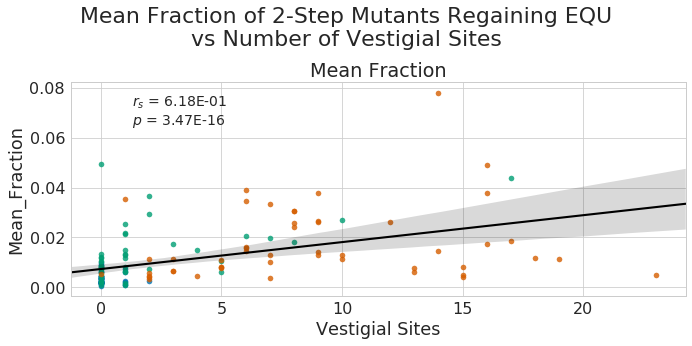

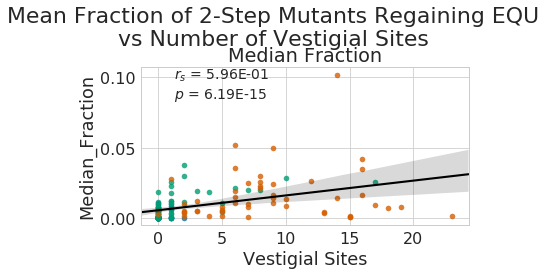

In [28]:
### Figures as mean and median
###################################

twostep = pd.read_pickle('205_CCE_MutLand_2Step_replicates.pd.pickle')
vests_repl = pd.read_pickle('201_CCE_VestigialSites_replicates.pd.pickle')

twostep_mean = twostep.groupby(['treatment','replicate'], as_index=False)['Fraction'].mean()
twostep_mean = twostep_mean.rename(columns={'Fraction': 'Mean_Fraction'})
twostep_median = twostep.groupby(['treatment','replicate'], as_index=False)['Fraction'].median()
twostep_median = twostep_median.rename(columns={'Fraction': 'Median_Fraction'})
# print twostep_mean.describe()
# print twostep_mean.head()

#print vests_repl

vestigials_equonly = vests_repl[vests_repl['Type'] == 'EQU Only']
#print vestigials_equonly.describe()


# print vestigials_equonly.describe()
# print vestigials_equonly.head()


twostep_merged = pd.merge(twostep_mean, twostep_median, on=['treatment', 'replicate'])
# print twostep_merged.describe()
# print twostep_merged.head()

vest_twostep_merged = pd.merge(twostep_merged, vestigials_equonly, on=['treatment', 'replicate'])
print vest_twostep_merged.describe()
print vest_twostep_merged.head()


siteset = vest_twostep_merged


# ### Set up the canvas
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)

fig = plt.figure(figsize=(10, 5)) 
gs = gridspec.GridSpec(1, 1)#, width_ratios=[1]) 




# # ## set up the colors
colors = ['b', 'g', 'r']
coldic = {}
for l,c in zip(siteset['treatment'].unique(), colors):
    coldic[l] = c


######## figures


ax = plt.subplot(gs[0])
for pid in siteset['treatment'].unique():
    bits = siteset[siteset['treatment'] == pid]
    sns.regplot(x=bits['Sites'], y=bits['Mean_Fraction'],
                fit_reg=False,
                ax=ax
               )
sns.regplot(x=siteset['Sites'], y=siteset['Mean_Fraction'], 
            ci=95,
            color='black',
            scatter=False, 
            ax=ax
           )
ax.legend()
#ax.set_ylim([0,0.4])
ax.set_title("Mean Fraction")
ax.set_xlabel("Vestigial Sites")

# ##### Calculate and print the correlation
correlation = ss.spearmanr(siteset['Sites'], siteset['Mean_Fraction'])
from decimal import Decimal

r2 = '%.2E' % Decimal(correlation[0])
p = '%.2E' % Decimal(correlation[1])

ann = "$r_{s}$ = " + r2 + "\n" + "$p$ = " + p

ax.annotate(ann, xy=(0.1,0.8),xycoords='axes fraction',
             fontsize=14)


# legend_patches = [mpl.patches.Patch(color=coldic[k], label=k) for k in coldic.keys()]
# lg = plt.legend(handles=legend_patches, 
#            #bbox_to_anchor=(1.05, 1), 
#                 loc=4, borderaxespad=0.)


plt.suptitle("Mean Fraction of 2-Step Mutants Regaining EQU\nvs Number of Vestigial Sites", size=22)
plt.tight_layout()


plt.subplots_adjust(top=0.77)


plt.show()





ax = plt.subplot(gs[0])
for pid in siteset['treatment'].unique():
    bits = siteset[siteset['treatment'] == pid]
    sns.regplot(x=bits['Sites'], y=bits['Median_Fraction'],
                fit_reg=False,
                ax=ax
               )
sns.regplot(x=siteset['Sites'], y=siteset['Median_Fraction'], 
            ci=95,
            color='black',
            scatter=False, 
            ax=ax
           )
ax.legend()
#ax.set_ylim([0,0.4])
ax.set_title("Median Fraction")
ax.set_xlabel("Vestigial Sites")

# ##### Calculate and print the correlation
correlation = ss.spearmanr(siteset['Sites'], siteset['Median_Fraction'])
from decimal import Decimal

r2 = '%.2E' % Decimal(correlation[0])
p = '%.2E' % Decimal(correlation[1])

ann = "$r_{s}$ = " + r2 + "\n" + "$p$ = " + p

ax.annotate(ann, xy=(0.1,0.8),xycoords='axes fraction',
             fontsize=14)


# legend_patches = [mpl.patches.Patch(color=coldic[k], label=k) for k in coldic.keys()]
# lg = plt.legend(handles=legend_patches, 
#            #bbox_to_anchor=(1.05, 1), 
#                 loc=4, borderaxespad=0.)


plt.suptitle("Mean Fraction of 2-Step Mutants Regaining EQU\nvs Number of Vestigial Sites", size=22)
plt.tight_layout()


plt.subplots_adjust(top=0.77)



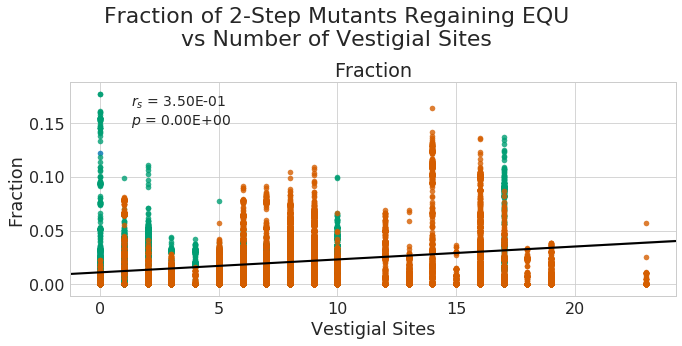

In [29]:
### Figures as data-point expansion
###################################

twostep = pd.read_pickle('205_CCE_MutLand_2Step_replicates.pd.pickle')
vests_repl = pd.read_pickle('201_CCE_VestigialSites_replicates.pd.pickle')
vestigials_equonly = vests_repl[vests_repl['Type'] == 'EQU Only']

#print twostep.describe()

vest_twostep_merged = pd.merge(twostep, vestigials_equonly, on=['treatment', 'replicate', 'Environment'])


#print vest_twostep_merged.describe()
#print vest_twostep_merged


siteset = vest_twostep_merged


# ### Set up the canvas
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)

fig = plt.figure(figsize=(10, 5)) 
gs = gridspec.GridSpec(1, 1)#, width_ratios=[1]) 




# # ## set up the colors
colors = ['b', 'g', 'r']
coldic = {}
for l,c in zip(siteset['treatment'].unique(), colors):
    coldic[l] = c


######## figures


ax = plt.subplot(gs[0])
for pid in siteset['treatment'].unique():
    bits = siteset[siteset['treatment'] == pid]
    sns.regplot(x=bits['Sites'], y=bits['Fraction'],
                fit_reg=False,
                ax=ax
               )
sns.regplot(x=siteset['Sites'], y=siteset['Fraction'], 
            ci=95,
            color='black',
            scatter=False, 
            ax=ax
           )
ax.legend()
#ax.set_ylim([0,0.4])
ax.set_title("Fraction")
ax.set_xlabel("Vestigial Sites")

# ##### Calculate and print the correlation
correlation = ss.spearmanr(siteset['Sites'], siteset['Fraction'])
from decimal import Decimal

r2 = '%.2E' % Decimal(correlation[0])
p = '%.2E' % Decimal(correlation[1])

ann = "$r_{s}$ = " + r2 + "\n" + "$p$ = " + p

ax.annotate(ann, xy=(0.1,0.8),xycoords='axes fraction',
             fontsize=14)


# legend_patches = [mpl.patches.Patch(color=coldic[k], label=k) for k in coldic.keys()]
# lg = plt.legend(handles=legend_patches, 
#            #bbox_to_anchor=(1.05, 1), 
#                 loc=4, borderaxespad=0.)


plt.suptitle("Fraction of 2-Step Mutants Regaining EQU\nvs Number of Vestigial Sites", size=22)
plt.tight_layout()


plt.subplots_adjust(top=0.77)



Intercept     0.007358
Vest_Sites    0.001079
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Mean_Fraction   R-squared:                       0.220
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     39.17
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           4.51e-09
Time:                        15:27:27   Log-Likelihood:                 439.77
No. Observations:                 141   AIC:                            -875.5
Df Residuals:                     139   BIC:                            -869.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

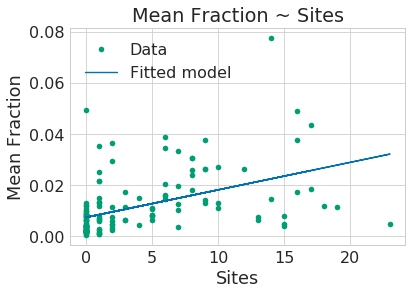

In [30]:
### Figures as data-point expansion
###################################

twostep = pd.read_pickle('205_CCE_MutLand_2Step_replicates.pd.pickle')
functs_repl = pd.read_pickle('201_CCE_FunctionalSites_replicates.pd.pickle')
vests_repl = pd.read_pickle('201_CCE_VestigialSites_replicates.pd.pickle')

#print functs_repl.head()

functionals_equonly = functs_repl[functs_repl['Type'] == 'EQU Only']
functionals_equonly = functionals_equonly.rename(columns={'Sites': 'Func_Sites'})

vestigials_equonly = vests_repl[vests_repl['Type'] == 'EQU Only']
vestigials_equonly = vestigials_equonly.rename(columns={'Sites': 'Vest_Sites'})

both = pd.merge(functionals_equonly, vestigials_equonly, on=['treatment', 'replicate', 'Environment', 'Type'])

# print both.describe()
# print both.head()

twostep_mean = twostep.groupby(['treatment','replicate'], as_index=False)['Fraction'].mean()
twostep_mean = twostep_mean.rename(columns={'Fraction': 'Mean_Fraction'})

both_twostep_merged = pd.merge(twostep_mean, both, on=['treatment', 'replicate'])

siteset = both_twostep_merged


import statsmodels.formula.api as sm
#>>> df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})

model = sm.ols(formula="Mean_Fraction ~ Vest_Sites", data=both_twostep_merged)

fitted = model.fit()
print fitted.params
print fitted.summary()

#plt.plot(both_twostep_merged['Func_Sites'], both_twostep_merged['Mean_Fraction'], 'ro')
plt.plot(both_twostep_merged['Vest_Sites'], both_twostep_merged['Mean_Fraction'], 'go')
#plt.plot(both_twostep_merged['Func_Sites'], fitted.fittedvalues, 'b')
plt.plot(both_twostep_merged['Vest_Sites'], fitted.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])

# model = sm.ols(formula='Gas ~ Temp', data=whiteside, subset = whiteside['Insul']=="Before")
# fitted = model.fit()
# print fitted.summary()
# Before = whiteside[whiteside["Insul"] == "Before"]
# plt.plot(Before["Temp"], Before["Gas"], 'ro')
# plt.plot(Before["Temp"], fitted.fittedvalues, 'b')
# plt.legend(['Data', 'Fitted model'])
# plt.ylim(0, 10)
# plt.xlim(-2, 12)
plt.xlabel('Sites')
plt.ylabel('Mean Fraction')
plt.title('Mean Fraction ~ Sites')

Intercept     0.000591
Func_Sites    0.001883
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Mean_Fraction   R-squared:                       0.433
Model:                            OLS   Adj. R-squared:                  0.429
Method:                 Least Squares   F-statistic:                     106.2
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           7.45e-19
Time:                        15:27:30   Log-Likelihood:                 462.29
No. Observations:                 141   AIC:                            -920.6
Df Residuals:                     139   BIC:                            -914.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

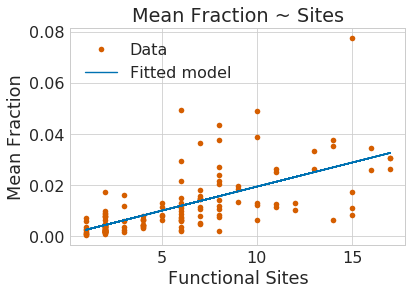

In [31]:
### Figures as data-point expansion
###################################

twostep = pd.read_pickle('205_CCE_MutLand_2Step_replicates.pd.pickle')
functs_repl = pd.read_pickle('201_CCE_FunctionalSites_replicates.pd.pickle')
vests_repl = pd.read_pickle('201_CCE_VestigialSites_replicates.pd.pickle')

#print functs_repl.head()

functionals_equonly = functs_repl[functs_repl['Type'] == 'EQU Only']
functionals_equonly = functionals_equonly.rename(columns={'Sites': 'Func_Sites'})

vestigials_equonly = vests_repl[vests_repl['Type'] == 'EQU Only']
vestigials_equonly = vestigials_equonly.rename(columns={'Sites': 'Vest_Sites'})

both = pd.merge(functionals_equonly, vestigials_equonly, on=['treatment', 'replicate', 'Environment', 'Type'])

# print both.describe()
# print both.head()

twostep_mean = twostep.groupby(['treatment','replicate'], as_index=False)['Fraction'].mean()
twostep_mean = twostep_mean.rename(columns={'Fraction': 'Mean_Fraction'})

both_twostep_merged = pd.merge(twostep_mean, both, on=['treatment', 'replicate'])

siteset = both_twostep_merged


import statsmodels.formula.api as sm
#>>> df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})

model = sm.ols(formula="Mean_Fraction ~ Func_Sites", data=both_twostep_merged)

fitted = model.fit()
print fitted.params
print fitted.summary()

plt.plot(both_twostep_merged['Func_Sites'], both_twostep_merged['Mean_Fraction'], 'ro')
#plt.plot(both_twostep_merged['Vest_Sites'], both_twostep_merged['Mean_Fraction'], 'go')
plt.plot(both_twostep_merged['Func_Sites'], fitted.fittedvalues, 'b')
#plt.plot(both_twostep_merged['Vest_Sites'], fitted.fittedvalues, 'b')
plt.legend(['Data', 'Fitted model'])

# model = sm.ols(formula='Gas ~ Temp', data=whiteside, subset = whiteside['Insul']=="Before")
# fitted = model.fit()
# print fitted.summary()
# Before = whiteside[whiteside["Insul"] == "Before"]
# plt.plot(Before["Temp"], Before["Gas"], 'ro')
# plt.plot(Before["Temp"], fitted.fittedvalues, 'b')
# plt.legend(['Data', 'Fitted model'])
# plt.ylim(0, 10)
# plt.xlim(-2, 12)
plt.xlabel('Functional Sites')
plt.ylabel('Mean Fraction')
plt.title('Mean Fraction ~ Sites')

Intercept     0.000308
Func_Sites    0.001604
Vest_Sites    0.000505
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Mean_Fraction   R-squared:                       0.472
Model:                            OLS   Adj. R-squared:                  0.464
Method:                 Least Squares   F-statistic:                     61.65
Date:                Mon, 27 Nov 2017   Prob (F-statistic):           7.39e-20
Time:                        15:28:29   Log-Likelihood:                 467.28
No. Observations:                 141   AIC:                            -928.6
Df Residuals:                     138   BIC:                            -919.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

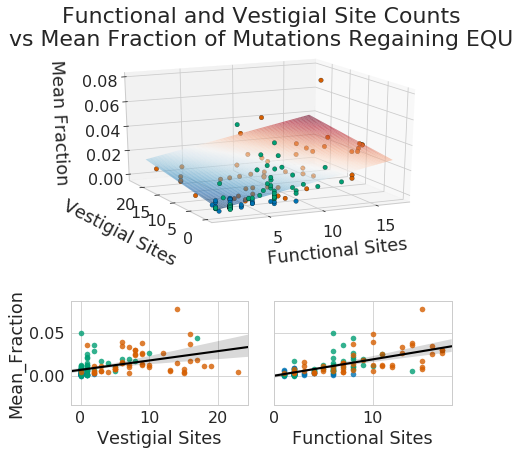

In [34]:
### Figures as data-point expansion
###################################

twostep = pd.read_pickle('205_CCE_MutLand_2Step_replicates.pd.pickle')
functs_repl = pd.read_pickle('201_CCE_FunctionalSites_replicates.pd.pickle')
vests_repl = pd.read_pickle('201_CCE_VestigialSites_replicates.pd.pickle')

#print functs_repl.head()

functionals_equonly = functs_repl[functs_repl['Type'] == 'EQU Only']
functionals_equonly = functionals_equonly.rename(columns={'Sites': 'Func_Sites'})

vestigials_equonly = vests_repl[vests_repl['Type'] == 'EQU Only']
vestigials_equonly = vestigials_equonly.rename(columns={'Sites': 'Vest_Sites'})

both = pd.merge(functionals_equonly, vestigials_equonly, on=['treatment', 'replicate', 'Environment', 'Type'])

# print both.describe()
# print both.head()

twostep_mean = twostep.groupby(['treatment','replicate'], as_index=False)['Fraction'].mean()
twostep_mean = twostep_mean.rename(columns={'Fraction': 'Mean_Fraction'})

both_twostep_merged = pd.merge(twostep_mean, both, on=['treatment', 'replicate'])

siteset = both_twostep_merged


import statsmodels.formula.api as sm
#>>> df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})

model = sm.ols(formula="Mean_Fraction ~ Func_Sites + Vest_Sites", data=both_twostep_merged)

fitted = model.fit()
print fitted.params
print fitted.summary()

print "##############################################################"

print fitted.summary().as_latex()

print "##############################################################"

print fitted.summary2()

print "##############################################################"

print fitted.summary2().as_latex()


import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

X = both_twostep_merged[['Func_Sites', 'Vest_Sites']]
y = both_twostep_merged['Mean_Fraction']

## fit a OLS model with intercept on TV and Radio
X = sm.add_constant(X)
est = sm.OLS(y, X).fit()




################### PLOT ##################
current_palette = sns.color_palette()
#sns.palplot(current_palette)

## Create the 3d plot -- skip reading this
# TV/Radio grid for 3d plot
xx1, xx2 = np.meshgrid(np.linspace(X.Func_Sites.min(), 
                                   X.Func_Sites.max(), 400), 
                       np.linspace(X.Vest_Sites.min(), 
                                   X.Vest_Sites.max(), 400))
# plot the hyperplane by evaluating the parameters on the grid
Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# create matplotlib 3d axes
fig = plt.figure(figsize=(7.5, 6))

gs = gridspec.GridSpec(2, 2,
                       width_ratios=[1, 1],
                       height_ratios=[2, 1])
ax = plt.subplot(gs[0, :], projection='3d')
ax2 = plt.subplot(gs[1, 0])
ax3 = plt.subplot(gs[1, 1], sharey=ax2)
plt.setp(ax3.get_yticklabels(), visible=False)

#ax = fig.add_subplot(2,2,1,  projection='3d')
ax.view_init(elev=20, azim=-115)
#ax = Axes3D(fig, azim=-115, elev=15)

# plot hyperplane
surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# plot data points - points over the HP are white, points below are black
resid = y - est.predict(X)
ctrl = both_twostep_merged[both_twostep_merged['treatment'] == 'control']
ben = both_twostep_merged[both_twostep_merged['treatment'] == 'noreward']
har = both_twostep_merged[both_twostep_merged['treatment'] == 'punish']

## control
ax.scatter(ctrl.Func_Sites, ctrl.Vest_Sites, ctrl.Mean_Fraction, 
           color='black', alpha=1.0, facecolor=current_palette[0], s=20)
## benign
ax.scatter(ben.Func_Sites, ben.Vest_Sites, ben.Mean_Fraction, 
           color='black', alpha=1.0, facecolor=current_palette[1], s=20)
## harsh
ax.scatter(har.Func_Sites, har.Vest_Sites, har.Mean_Fraction, 
           color='black', alpha=1.0, facecolor=current_palette[2], s=20)


# set axis labels
ax.set_xlabel('Functional Sites',  labelpad=18)
ax.set_ylabel('Vestigial Sites', labelpad=18)
ax.set_zlabel('Mean Fraction', labelpad=18, rotation=270)

siteset = both_twostep_merged

#ax2 = fig.add_subplot(2,2,4)
for pid, c in zip(siteset['treatment'].unique(), current_palette):
    bits = siteset[siteset['treatment'] == pid]
    sns.regplot(x=bits['Vest_Sites'], y=bits['Mean_Fraction'],
                fit_reg=False,
                color=c,
                ax=ax2
               )
sns.regplot(x=siteset['Vest_Sites'], y=siteset['Mean_Fraction'], 
            ci=95,
            color='black',
            scatter=False, 
            ax=ax2
           )
#ax.legend()
#ax.set_ylim([0,0.4])
#ax2.set_title("Mean Fraction")
ax2.set_xlabel("Vestigial Sites")



#ax3 = fig.add_subplot(2,2,3)
for pid, c in zip(siteset['treatment'].unique(), current_palette):
    bits = siteset[siteset['treatment'] == pid]
    sns.regplot(x=bits['Func_Sites'], y=bits['Mean_Fraction'],
                fit_reg=False,
                color=c,
                ax=ax3
               )
sns.regplot(x=siteset['Func_Sites'], y=siteset['Mean_Fraction'], 
            ci=95,
            color='black',
            scatter=False, 
            ax=ax3
           )
#ax.legend()
#ax.set_ylim([0,0.4])
#ax3.set_title("Mean Fraction")
ax3.set_ylabel("")
ax3.set_xlabel("Functional Sites")

gs.tight_layout(fig, rect=[0, 0, 0.9, 1])

#current_palette = sns.color_palette()
#sns.palplot(current_palette)

ax.set_title("Functional and Vestigial Site Counts\nvs Mean Fraction of Mutations Regaining EQU", fontsize=22)

pos1 = ax.get_position() # get the original position 
pos2 = [pos1.x0, pos1.y0 + 0.05,  pos1.width, pos1.height] 
ax.set_position(pos2) # set a new position


!pwd
plt.savefig("CCE_2step_vs_func_vest_sites.png", dpi=300, bbox_inches='tight')

# correlation = ss.pearsonr(siteset['Sites'], siteset['Fraction'])
# from decimal import Decimal

# r2 = '%.2E' % Decima(0.472) #(per data)
# p = '%.2E' % Decimal(correlation[1])

# ann = "$r_{2}$ = " + r2 + "\n" + "$p$ = " + p

# ax.annotate(ann, xy=(0.1,0.8),xycoords='axes fraction',
#              fontsize=14)

#plt.subplots_adjust(top=0.50)

  treatment  replicate  Mean_Fraction      Type  Func_Sites  \
0   control          1       0.004039  EQU Only           4   
1   control          2       0.004564  EQU Only           4   
2   control          3       0.000357  EQU Only           1   
3   control          4       0.004238  EQU Only           2   
4   control          5       0.009106  EQU Only           2   

         Environment      Site_x  Vest_Sites     Site_y  Total_Sites  
0  Static\n(control)  Functional           0  Vestigial            4  
1  Static\n(control)  Functional           0  Vestigial            4  
2  Static\n(control)  Functional           0  Vestigial            1  
3  Static\n(control)  Functional           0  Vestigial            2  
4  Static\n(control)  Functional           0  Vestigial            2  
#################################################
######    control                      ########
#################################################
Intercept      0.003720
Total_Sites   -0.000107

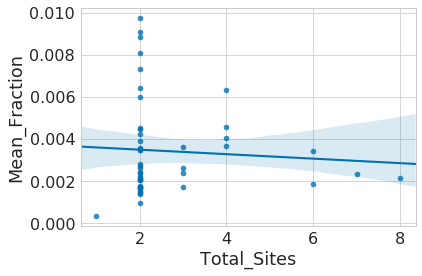

   treatment  replicate  Mean_Fraction      Type  Func_Sites Environment  \
48  noreward          1       0.005920  EQU Only           6      Benign   
49  noreward          2       0.004528  EQU Only           2      Benign   
50  noreward          3       0.001040  EQU Only           1      Benign   
51  noreward          4       0.027085  EQU Only           8      Benign   
52  noreward          5       0.014865  EQU Only           7      Benign   

        Site_x  Vest_Sites     Site_y  Total_Sites  
48  Functional           0  Vestigial            6  
49  Functional           0  Vestigial            2  
50  Functional           1  Vestigial            2  
51  Functional          10  Vestigial           18  
52  Functional           4  Vestigial           11  
#################################################
######    noreward                      ########
#################################################
Intercept      0.003621
Total_Sites    0.001252
dtype: float64
             

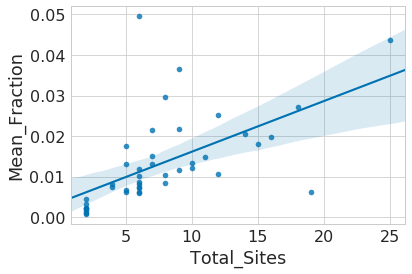

   treatment  replicate  Mean_Fraction      Type  Func_Sites Environment  \
91    punish          1       0.012804  EQU Only          11       Harsh   
92    punish          2       0.012898  EQU Only          10       Harsh   
93    punish          3       0.004812  EQU Only           2       Harsh   
94    punish          4       0.039025  EQU Only          10       Harsh   
95    punish          5       0.003673  EQU Only           1       Harsh   

        Site_x  Vest_Sites     Site_y  Total_Sites  
91  Functional           7  Vestigial           18  
92  Functional           9  Vestigial           19  
93  Functional          23  Vestigial           25  
94  Functional           6  Vestigial           16  
95  Functional           7  Vestigial            8  
#################################################
######    punish                      ########
#################################################
Intercept     -0.002450
Total_Sites    0.001131
dtype: float64
               

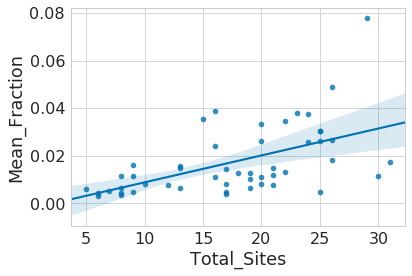

   treatment  replicate  Mean_Fraction      Type  Func_Sites Environment  \
48  noreward          1       0.005920  EQU Only           6      Benign   
49  noreward          2       0.004528  EQU Only           2      Benign   
50  noreward          3       0.001040  EQU Only           1      Benign   
51  noreward          4       0.027085  EQU Only           8      Benign   
52  noreward          5       0.014865  EQU Only           7      Benign   

        Site_x  Vest_Sites     Site_y  Total_Sites  
48  Functional           0  Vestigial            6  
49  Functional           0  Vestigial            2  
50  Functional           1  Vestigial            2  
51  Functional          10  Vestigial           18  
52  Functional           4  Vestigial           11  
#################################################
######    not control                      ########
#################################################
Intercept      0.004081
Total_Sites    0.000878
dtype: float64
          

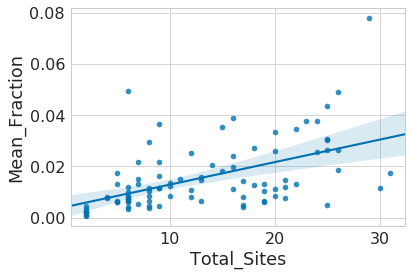

  treatment  replicate  Mean_Fraction      Type  Func_Sites  \
0   control          1       0.004039  EQU Only           4   
1   control          2       0.004564  EQU Only           4   
2   control          3       0.000357  EQU Only           1   
3   control          4       0.004238  EQU Only           2   
4   control          5       0.009106  EQU Only           2   

         Environment      Site_x  Vest_Sites     Site_y  Total_Sites  
0  Static\n(control)  Functional           0  Vestigial            4  
1  Static\n(control)  Functional           0  Vestigial            4  
2  Static\n(control)  Functional           0  Vestigial            1  
3  Static\n(control)  Functional           0  Vestigial            2  
4  Static\n(control)  Functional           0  Vestigial            2  
#################################################
######    All                      ########
#################################################
Intercept      0.002183
Total_Sites    0.000972
dty

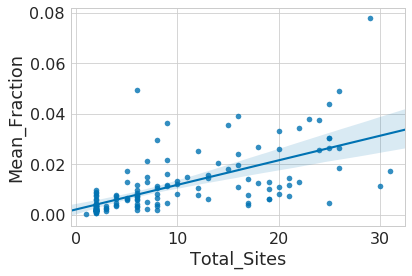

In [314]:
### Figures as data-point expansion
###################################

twostep = pd.read_pickle('205_CCE_MutLand_2Step_replicates.pd.pickle')
functs_repl = pd.read_pickle('201_CCE_FunctionalSites_replicates.pd.pickle')
vests_repl = pd.read_pickle('201_CCE_VestigialSites_replicates.pd.pickle')

#print functs_repl.head()

functionals_equonly = functs_repl[functs_repl['Type'] == 'EQU Only']
functionals_equonly = functionals_equonly.rename(columns={'Sites': 'Func_Sites'})

vestigials_equonly = vests_repl[vests_repl['Type'] == 'EQU Only']
vestigials_equonly = vestigials_equonly.rename(columns={'Sites': 'Vest_Sites'})

both = pd.merge(functionals_equonly, vestigials_equonly, on=['treatment', 'replicate', 'Environment', 'Type'])

both['Total_Sites'] = both.apply(lambda row: row['Func_Sites'] + row['Vest_Sites'], axis=1)

#print both.describe()
#print both.head()

twostep_mean = twostep.groupby(['treatment','replicate'], as_index=False)['Fraction'].mean()
twostep_mean = twostep_mean.rename(columns={'Fraction': 'Mean_Fraction'})

both_twostep_merged = pd.merge(twostep_mean, both, on=['treatment', 'replicate'])




overset = both_twostep_merged
for t in (overset['treatment'].unique()):

    siteset = overset[overset['treatment'] == t]
    
    print siteset.head()
    
    import statsmodels.formula.api as sm
    model = sm.ols(formula="Mean_Fraction ~ Total_Sites", data=siteset)

    fitted = model.fit()
    print "#################################################"
    print "######    " + t + "                      ########"
    print "#################################################"
    print fitted.params
    print fitted.summary()

    sns.regplot(x='Total_Sites', y='Mean_Fraction', data=siteset)
    plt.show()
    
#     plt.plot(siteset['Total_Sites'], siteset['Mean_Fraction'], 'ro')
#     #plt.plot(both_twostep_merged['Vest_Sites'], both_twostep_merged['Mean_Fraction'], 'go')
#     plt.plot(siteset['Total_Sites'], fitted.fittedvalues, 'b')
#     #plt.plot(both_twostep_merged['Vest_Sites'], fitted.fittedvalues, 'b')
#     plt.legend(['Data', 'Fitted model'])
#     plt.xlabel('Total Sites')
#     plt.ylabel('Mean Fraction')
#     plt.title(t+'Mean Fraction ~ Total Sites')
#     plt.show()

t = "not control"
siteset = overset[overset['treatment'] != 'control']

print siteset.head()

import statsmodels.formula.api as sm
model = sm.ols(formula="Mean_Fraction ~ Total_Sites", data=siteset)

fitted = model.fit()
print "#################################################"
print "######    " + t + "                      ########"
print "#################################################"
print fitted.params
print fitted.summary()

sns.regplot(x='Total_Sites', y='Mean_Fraction', data=siteset)
plt.show()



t = "All"
siteset = overset

print siteset.head()

import statsmodels.formula.api as sm
model = sm.ols(formula="Mean_Fraction ~ Total_Sites", data=siteset)

fitted = model.fit()
print "#################################################"
print "######    " + t + "                      ########"
print "#################################################"
print fitted.params
print fitted.summary()

sns.regplot(x='Total_Sites', y='Mean_Fraction', data=siteset)
plt.show()








# import statsmodels.formula.api as sm
# #>>> df = pd.DataFrame({"A": [10,20,30,40,50], "B": [20, 30, 10, 40, 50], "C": [32, 234, 23, 23, 42523]})

# model = sm.ols(formula="Mean_Fraction ~ Func_Sites + Vest_Sites", data=both_twostep_merged)

# fitted = model.fit()
# print fitted.params
# print fitted.summary()






# import statsmodels.api as sm
# from mpl_toolkits.mplot3d import Axes3D

# X = both_twostep_merged[['Func_Sites', 'Vest_Sites']]
# y = both_twostep_merged['Mean_Fraction']

# ## fit a OLS model with intercept on TV and Radio
# X = sm.add_constant(X)
# est = sm.OLS(y, X).fit()

# ## Create the 3d plot -- skip reading this
# # TV/Radio grid for 3d plot
# xx1, xx2 = np.meshgrid(np.linspace(X.Func_Sites.min(), X.Func_Sites.max(), 100), 
#                        np.linspace(X.Vest_Sites.min(), X.Vest_Sites.max(), 100))
# # plot the hyperplane by evaluating the parameters on the grid
# Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# # create matplotlib 3d axes
# fig = plt.figure(figsize=(12, 8))
# ax = Axes3D(fig, azim=-115, elev=15)

# # plot hyperplane
# surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# # plot data points - points over the HP are white, points below are black
# resid = y - est.predict(X)
# ax.scatter(X[resid >= 0].Func_Sites, X[resid >= 0].Vest_Sites, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
# ax.scatter(X[resid < 0].Func_Sites, X[resid < 0].Vest_Sites, y[resid < 0], color='black', alpha=1.0)

# # set axis labels
# ax.set_xlabel('Func_Sites')
# ax.set_ylabel('Vest_Sites')
# ax.set_zlabel('Mean_Fraction')




# # plt.plot(both_twostep_merged['Func_Sites'], both_twostep_merged['Mean_Fraction'], 'ro')
# # plt.plot(both_twostep_merged['Vest_Sites'], both_twostep_merged['Mean_Fraction'], 'go')
# # plt.plot(both_twostep_merged['Func_Sites'], fitted.fittedvalues, 'b')
# # plt.plot(both_twostep_merged['Vest_Sites'], fitted.fittedvalues, 'b')
# # plt.legend(['Data', 'Fitted model'])

# # # model = sm.ols(formula='Gas ~ Temp', data=whiteside, subset = whiteside['Insul']=="Before")
# # # fitted = model.fit()
# # # print fitted.summary()
# # # Before = whiteside[whiteside["Insul"] == "Before"]
# # # plt.plot(Before["Temp"], Before["Gas"], 'ro')
# # # plt.plot(Before["Temp"], fitted.fittedvalues, 'b')
# # # plt.legend(['Data', 'Fitted model'])
# # # plt.ylim(0, 10)
# # # plt.xlim(-2, 12)
# # plt.xlabel('Sites')
# # plt.ylabel('Mean Fraction')
# # plt.title('Mean Fraction ~ Sites')

  treatment  replicate  Mean_Fraction      Type  Func_Sites  \
0   control          1       0.004039  EQU Only           4   
1   control          2       0.004564  EQU Only           4   
2   control          3       0.000357  EQU Only           1   
3   control          4       0.004238  EQU Only           2   
4   control          5       0.009106  EQU Only           2   

         Environment      Site_x  Vest_Sites     Site_y  Total_Sites  
0  Static\n(control)  Functional           0  Vestigial            4  
1  Static\n(control)  Functional           0  Vestigial            4  
2  Static\n(control)  Functional           0  Vestigial            1  
3  Static\n(control)  Functional           0  Vestigial            2  
4  Static\n(control)  Functional           0  Vestigial            2  
#################################################
######    All                      ########
#################################################
Intercept      0.002183
Total_Sites    0.000972
dty

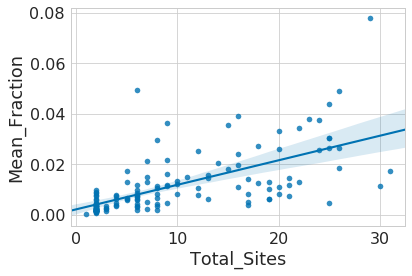

#################################################
## Mean_Fraction ~ Total_Sites + C(treatment)  ##
#################################################
Intercept                   0.000459
C(treatment)[T.noreward]    0.004059
C(treatment)[T.punish]     -0.002980
Total_Sites                 0.001135
dtype: float64
                            OLS Regression Results                            
Dep. Variable:          Mean_Fraction   R-squared:                       0.465
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     39.77
Date:                Wed, 15 Nov 2017   Prob (F-statistic):           1.50e-18
Time:                        14:53:24   Log-Likelihood:                 466.43
No. Observations:                 141   AIC:                            -924.9
Df Residuals:                     137   BIC:                            -913.1
Df Model:                           3                  

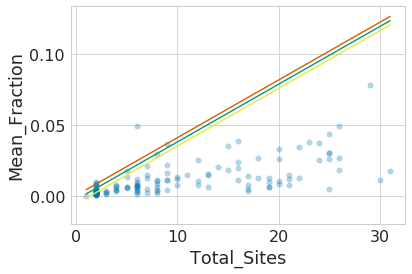

In [321]:
### Figures as data-point expansion
###################################

twostep = pd.read_pickle('205_CCE_MutLand_2Step_replicates.pd.pickle')
functs_repl = pd.read_pickle('201_CCE_FunctionalSites_replicates.pd.pickle')
vests_repl = pd.read_pickle('201_CCE_VestigialSites_replicates.pd.pickle')

#print functs_repl.head()

functionals_equonly = functs_repl[functs_repl['Type'] == 'EQU Only']
functionals_equonly = functionals_equonly.rename(columns={'Sites': 'Func_Sites'})

vestigials_equonly = vests_repl[vests_repl['Type'] == 'EQU Only']
vestigials_equonly = vestigials_equonly.rename(columns={'Sites': 'Vest_Sites'})

both = pd.merge(functionals_equonly, vestigials_equonly, on=['treatment', 'replicate', 'Environment', 'Type'])

both['Total_Sites'] = both.apply(lambda row: row['Func_Sites'] + row['Vest_Sites'], axis=1)

#print both.describe()
#print both.head()

twostep_mean = twostep.groupby(['treatment','replicate'], as_index=False)['Fraction'].mean()
twostep_mean = twostep_mean.rename(columns={'Fraction': 'Mean_Fraction'})

both_twostep_merged = pd.merge(twostep_mean, both, on=['treatment', 'replicate'])




overset = both_twostep_merged



t = "All"
siteset = overset

print siteset.head()

import statsmodels.formula.api as sm
model = sm.ols(formula="Mean_Fraction ~ Total_Sites", data=overset)

fitted = model.fit()
print "#################################################"
print "######    " + t + "                      ########"
print "#################################################"
print fitted.params
print fitted.summary()

sns.regplot(x='Total_Sites', y='Mean_Fraction', data=overset)
plt.show()







model = sm.ols(formula="Mean_Fraction ~ Total_Sites + C(treatment)", data=overset)
fitted = model.fit()
print "#################################################"
print "## Mean_Fraction ~ Total_Sites + C(treatment)  ##"
print "#################################################"
print fitted.params
print fitted.summary()

plt.scatter(overset['Total_Sites'], overset['Mean_Fraction'], alpha=0.3)
plt.xlabel('Total_Sites')
plt.ylabel('Mean_Fraction')

sites_linspace = np.linspace(overset.Total_Sites.min(), overset.Total_Sites.max(), 100)

est = fitted

plt.plot(sites_linspace, est.params[0] + est.params[1] * sites_linspace + est.params[2] * 0, 'r')
plt.plot(sites_linspace, est.params[0] + est.params[1] * sites_linspace + est.params[2] * 1, 'g')
plt.plot(sites_linspace, est.params[0] + est.params[1] * sites_linspace + est.params[2] * 2, 'y')
#short_summary(est)


# import statsmodels.api as sm
# from mpl_toolkits.mplot3d import Axes3D

# X = overset[['Total_Sites', 'treatment']]
# y = overset['Mean_Fraction']

# ## fit a OLS model with intercept on TV and Radio
# X = sm.add_constant(X)
# est = sm.OLS(y, X).fit()

# ## Create the 3d plot -- skip reading this
# # TV/Radio grid for 3d plot
# xx1, xx2 = np.meshgrid(np.linspace(X.Total_Sites.min(), X.Total_Sites.max(), 100), 
#                        np.linspace(X.Vest_Sites.min(), X.Vest_Sites.max(), 100))
# # plot the hyperplane by evaluating the parameters on the grid
# Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

# # create matplotlib 3d axes
# fig = plt.figure(figsize=(12, 8))
# ax = Axes3D(fig, azim=-115, elev=15)

# # plot hyperplane
# surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

# # plot data points - points over the HP are white, points below are black
# resid = y - est.predict(X)
# ax.scatter(X[resid >= 0].Func_Sites, X[resid >= 0].Vest_Sites, y[resid >= 0], color='black', alpha=1.0, facecolor='white')
# ax.scatter(X[resid < 0].Func_Sites, X[resid < 0].Vest_Sites, y[resid < 0], color='black', alpha=1.0)

# # set axis labels
# ax.set_xlabel('Func_Sites')
# ax.set_ylabel('Vest_Sites')
# ax.set_zlabel('Mean_Fraction')

# Stats

In [ ]:
def mww(a, b, nameA, nameB, title, field):
    print
    print title + " - " + nameA + " vs " + nameB
    print "-----------------"
    print stats.ranksums(a[field], b[field]) 
    z_stat, p_val = stats.ranksums(a[field], b[field])  

    if p_val < 0.00001:
        p_text = " $<<$ 0.001"
    elif p_val < 0.001:
        p_text = " < 0.001"
    elif p_val < 0.01:
        p_text = " < 0.01"        
    elif p_val < 0.05:
        p_text = " $<$ 0.05"
    else:
        p_text = " = " + str(round(p_val, 2))
        
    #print (z_stat)
    #print (p_val)

    if p_val < (0.05/3): #bonferroni
        print ("reject null of sameness (different)")
    else:
        print ("can't reject null of sameness")
    print "medians"
    print nameA, a[field].median()
    print nameB, b[field].median()
    
    print "(Wilcoxon Rank Sum Test: Z = " + str(round(z_stat, 2)) + ", p" + p_text + ")"

def kruskal(a, b, c, field=None, verbose=False):
    x = a[field].dropna()
    y = b[field].dropna()
    z = c[field].dropna()    

    if verbose:
        print a[field].describe()
        print b[field].describe()
        print c[field].describe()
        print
        print x
        print y
        print z
    
    print stats.kruskal(x, y, z)
    
def medianCI(data, ci=0.95, p=0.5):    
    '''
    From https://github.com/minddrummer/median-confidence-interval/blob/master/Median_CI.py
    data: pandas datafame/series or numpy array
    ci: confidence level
    p: percentile' percent, for median it is 0.5
    output: a list with two elements, [lowerBound, upperBound]
    '''
    if type(data) is pd.Series or type(data) is pd.DataFrame:
        #transfer data into np.array
        data = data.values

    #flat to one dimension array
    data = data.reshape(-1)
    data = np.sort(data)
    N = data.shape[0]
    
    lowCount, upCount = stats.binom.interval(ci, N, p, loc=0)
    #given this: https://onlinecourses.science.psu.edu/stat414/node/316
    #lowCount and upCount both refers to  W's value, W follows binomial Dis.
    #lowCount need to change to lowCount-1, upCount no need to change in python indexing
    lowCount -= 1
    # print lowCount, upCount
    return data[int(lowCount)], data[int(upCount)]  

def doCI(data):
    
    low, high = medianCI(data)
    
    med = data.median()
    
    print "(Mdn = " +str(round(med, 2))+ ", CI 95\% [" + str(round(low, 2)) + ", " + str(round(high, 2)) + "])"
    print " --- (Mdn = " +str(round(med, 4))+ ", CI 95\% [" + str(round(low, 4)) + ", " + str(round(high, 4)) + "])"
    
def corr(a, b, nameA, nameB, title, fieldA, fieldB):
    print
    print title + " - " + nameA + " vs " + nameB
    print "-----------------"
#     print stats.ranksums(a[field], b[field]) 
#     z_stat, p_val = stats.ranksums(a[field], b[field])  
    
    correlation = ss.pearsonr(a[fieldA], b[fieldB])

    from decimal import Decimal

    #r2 = '%.2E' % Decimal(correlation[0])
    p = '%.2E' % Decimal(correlation[1])
    
    p_val = correlation[1]

    #ann = "$r_{2}$ = " + str(round(correlation[0], 2)) + "\n" + "$p$ = " + p

    if p_val < 0.00001:
        p_text = " $<<$ 0.001"
    elif p_val < 0.001:
        p_text = " < 0.001"
    elif p_val < 0.01:
        p_text = " < 0.01"        
    elif p_val < 0.05:
        p_text = " $<$ 0.05"
    else:
        p_text = " = " + str(round(p_val, 2))
        
    print "(Pearson's R: $r_{2}$ = " + str(round(correlation[0], 2)) + ", p = " + p_text + ")"   
    
    #(Pearson's R: $r_{2}$ = X, p = $<<$ 0.001)
        
    #print (z_stat)
    #print (p_val)

#     if p_val < (0.05/3): #bonferroni
#         print ("reject null of sameness (different)")
#     else:
#         print ("can't reject null of sameness")
    print "medians"
    print nameA, a[fieldA].median()
    print nameB, b[fieldB].median()
    
#    print "(Wilcoxon Rank Sum Tbest: Z = " + str(round(z_stat, 2)) + ", p" + p_text + ")"b

In [ ]:
corr()

# Correlation between functional sites and 2-step survey

In [90]:


# sns.set(#style="whitegrid", 
#         color_codes=True, 
#         palette="bright"
# )
# sns.set_context('paper', font_scale=2)
# g = sns.factorplot(x="Environment", y="Sites",
#                    hue="Type",
#                    col="Site",
#                    data=combined, 
#                    hue_order=["XOR Only", "EQU Only", "XOR & EQU"],
#                    size=5, aspect=.75, #
#                    palette={"EQU Only": "b", 
#                             "XOR Only": "r",
#                             "XOR & EQU": "#89008E"},
#                    kind="box", 
#                    legend=False)        

# plt.subplots_adjust(top=0.85)
# g.fig.suptitle("       Cyclic Changing Environment") # can also get the figure from plt.gcf()   

# titles = ["Functional Site Count", "Vestigial Site Count"]
# for ax, title in zip(g.axes.flat, titles):
#     ax.set_title(title)
    
# L=plt.legend(loc="upper left")

# #plt.subplots_adjust(top=0.85)
# #g.fig.suptitle("       Cyclic Changing Environment") # can also get the figure from plt.gcf()   

/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*control*dominant_active_site_counts.csv
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*noreward*dominant_active_site_counts.csv
/Core/home/rosiec/Dropbox/School_Docs/Papers/Journal CE Paper/data_analysis/raw_data/082_Final/../201_CyclicCE//*punish*dominant_active_site_counts.csv


['Regained EQU']
['Static\n(control)' 'Benign' 'Harsh']
3616
49


ValueError: all the input array dimensions except for the concatenation axis must match exactly

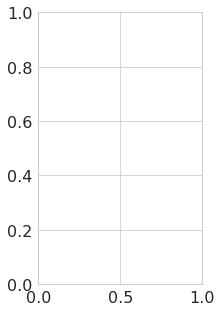

In [99]:
# ### Set up the canvas
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)

fig = plt.figure(figsize=(10, 5)) 
gs = gridspec.GridSpec(1, 3)#, width_ratios=[1]) 

twostep = pd.read_pickle('205_CCE_MutLand_2Step.pd.pickle')

# # ## set up the colors
colors = ['b', 'g', 'r']
coldic = {}
for l,c in zip(actives['Environment'].unique(), colors):
    coldic[l] = c

    
print twostep['Type'].unique()
print twostep['Environment'].unique()

######## figures
#for g, sitetype in zip(gs, twostep['Type'].unique()):

ax = plt.subplot(gs[0])

fractionsbit = twostep[twostep['Type'] == 'Regained EQU']
sitesbit = actives[actives['Type'] == 'EQU Only']

for pid in actives['Environment'].unique():

    subset_fractions_bit = fractionsbit[fractionsbit['Environment'] == pid]
    subset_sites_bit = sitesbit[sitesbit['Environment'] == pid]

    print len(subset_fractions_bit)
    print len(subset_sites_bit)


    sns.regplot(x=subset_sites_bit['Sites'], y=subset_fractions_bit['Fraction'],
                fit_reg=False,
                ax=ax
               )
sns.regplot(x=sitesbit['Sites'], y=fractionsbit['Fraction'], 
            data=merged, 
            ci=95,
            color='black',
            scatter=False, 
            ax=ax
           )
ax.legend()
ax.set_ylim([0,0.4])
ax.set_title(sitetype)
#ax2.set_ylabel("Fraction Beneficial")
ax.set_xlabel("Functional Sites")


# ##### Calculate and print the correlation
correlation = ss.pearsonr(sitesbit['Sites'], fractionsbit['Fraction'])
from decimal import Decimal

r2 = '%.2E' % Decimal(correlation[0])
p = '%.2E' % Decimal(correlation[1])

ann = "$r_{2}$ = " + r2 + "\n" + "$p$ = " + p

ax.annotate(ann, xy=(0.1,0.8),xycoords='axes fraction',
             fontsize=14)


# legend_patches = [mpl.patches.Patch(color=coldic[k], label=k) for k in coldic.keys()]
# lg = plt.legend(handles=legend_patches, 
#            #bbox_to_anchor=(1.05, 1), 
#                 loc=4, borderaxespad=0.)


plt.suptitle("Fraction of 1-Step Mutants Losing EQU\nvs Number of Functional Sites", size=22)
plt.tight_layout()


plt.subplots_adjust(top=0.77)



## SHIT. This can't be done because I can't take the mean of the fraction and 
# line it up with its originating replicate, which is where the vestigial site counts are meaned to.


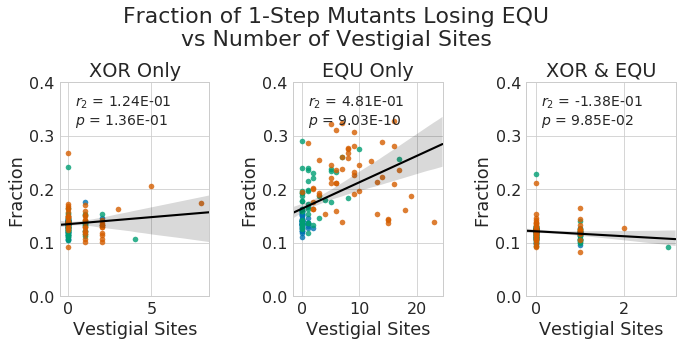

In [85]:
# ### Set up the canvas
sns.set(style="whitegrid", color_codes=True, palette="colorblind")
sns.set_context('paper', font_scale=2)

fig = plt.figure(figsize=(10, 5)) 
gs = gridspec.GridSpec(1, 3)#, width_ratios=[1]) 

onestep = pd.read_pickle('203_CCE_MutLand_1Step.pd.pickle')
siteset = vestigials

# # ## set up the colors
colors = ['b', 'g', 'r']
coldic = {}
for l,c in zip(siteset['Environment'].unique(), colors):
    coldic[l] = c


######## figures
for g, sitetype in zip(gs, onestep['Type'].unique()):

    ax = plt.subplot(g)
    
    fractionsbit = onestep[onestep['Type'] == sitetype]
    sitesbit = siteset[siteset['Type'] == sitetype]

    for pid in siteset['Environment'].unique():

        equonly_fractions_bit = fractionsbit[fractionsbit['Environment'] == pid]
        equonly_sites_bit = sitesbit[sitesbit['Environment'] == pid]

        sns.regplot(x=equonly_sites_bit['Sites'], y=equonly_fractions_bit['Fraction'],
                    fit_reg=False,
                    ax=ax
                   )
    sns.regplot(x=sitesbit['Sites'], y=fractionsbit['Fraction'], 
                data=merged, 
                ci=95,
                color='black',
                scatter=False, 
                ax=ax
               )
    ax.legend()
    ax.set_ylim([0,0.4])
    ax.set_title(sitetype)
    #ax2.set_ylabel("Fraction Beneficial")
    ax.set_xlabel("Vestigial Sites")

    
    # ##### Calculate and print the correlation
    correlation = ss.pearsonr(sitesbit['Sites'], fractionsbit['Fraction'])
    from decimal import Decimal

    r2 = '%.2E' % Decimal(correlation[0])
    p = '%.2E' % Decimal(correlation[1])

    ann = "$r_{2}$ = " + r2 + "\n" + "$p$ = " + p

    ax.annotate(ann, xy=(0.1,0.8),xycoords='axes fraction',
                 fontsize=14)


# legend_patches = [mpl.patches.Patch(color=coldic[k], label=k) for k in coldic.keys()]
# lg = plt.legend(handles=legend_patches, 
#            #bbox_to_anchor=(1.05, 1), 
#                 loc=4, borderaxespad=0.)


plt.suptitle("Fraction of 1-Step Mutants Losing EQU\nvs Number of Vestigial Sites", size=22)
plt.tight_layout()


plt.subplots_adjust(top=0.77)

